##IMPORTATION DES BIBLIOTHEQUES BASIQUES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###JEU DE DONNEES MFEAT-FAC



In [ ]:
mfeat_fac= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-fac'
mfeat_fac= pd.read_table(mfeat_fac, sep = "\s+",header=None)

In [ ]:
mfeat_fac.head()

0    1    2    3    4    5    6    7    8    9    ...  206  207  208  209  \
0   98  236  531  673  607  647    2    9    3    6  ...  474  536  628  632   
1  121  193  607  611  585  665    7    9    2    4  ...  520  458  570  634   
2  115  141  590  605  557  627   12    6    3    3  ...  535  498  572  656   
3   90  122  627  692  607  642    0    6    4    5  ...  576  549  628  621   
4  157  167  681  666  587  666    8    6    1    4  ...  594  525  568  653   

   210  211  212  213  214  215  
0   18   36    8   15   12   13  
1   15   32   11   13   15   11  
2   20   35   16   14   13    6  
3   16   35    7   12   15    9  
4   16   35   10   15   13   13  

[5 rows x 216 columns]

In [ ]:
mfeat_fac.shape

(2000, 216)

In [ ]:
mfeat_fac.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
211    0
212    0
213    0
214    0
215    0
Length: 216, dtype: int64

In [ ]:
mfeat_fac.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
211    int64
212    int64
213    int64
214    int64
215    int64
Length: 216, dtype: object

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_fac,"fac")
mfeat_fac.head()

fac0  fac1  fac2  fac3  fac4  fac5  fac6  fac7  fac8  fac9  ...  fac206  \
0    98   236   531   673   607   647     2     9     3     6  ...     474   
1   121   193   607   611   585   665     7     9     2     4  ...     520   
2   115   141   590   605   557   627    12     6     3     3  ...     535   
3    90   122   627   692   607   642     0     6     4     5  ...     576   
4   157   167   681   666   587   666     8     6     1     4  ...     594   

   fac207  fac208  fac209  fac210  fac211  fac212  fac213  fac214  fac215  
0     536     628     632      18      36       8      15      12      13  
1     458     570     634      15      32      11      13      15      11  
2     498     572     656      20      35      16      14      13       6  
3     549     628     621      16      35       7      12      15       9  
4     525     568     653      16      35      10      15      13      13  

[5 rows x 216 columns]

##**METHODE ACP** 

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_fac=scaler.fit_transform(mfeat_fac)

In [ ]:
scaled_mfeat_fac

array([[-1.90735868, -0.79274325, -1.74027935, ...,  1.17558452,
        -0.85869511, -0.09760513],
       [-1.65531116, -1.18579904, -1.19783496, ...,  0.40013299,
         0.65264858, -0.52900903],
       [-1.72106269, -1.66112232, -1.31917121, ...,  0.78785876,
        -0.35491388, -1.60751878],
       ...,
       [ 0.71174385, -0.21687082,  0.55083443, ...,  1.17558452,
         1.66021104,  1.62801046],
       [-0.27452907, -0.56422244,  0.65075839, ...,  0.40013299,
         0.65264858,  0.33379877],
       [ 0.90899844,  0.51439577,  0.65789582, ...,  0.01240722,
        -0.85869511,  1.41230851]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_fac= np.cov(scaled_mfeat_fac,rowvar=False)
cov_mfeat_fac.shape

(216, 216)

In [ ]:
cov_mfeat_fac

array([[ 1.00050025,  0.50381622,  0.55326376, ..., -0.08912906,
        -0.20007903,  0.10347742],
       [ 0.50381622,  1.00050025,  0.63377375, ..., -0.37625566,
        -0.3024825 ,  0.06524884],
       [ 0.55326376,  0.63377375,  1.00050025, ..., -0.25421711,
        -0.27376385,  0.20097479],
       ...,
       [-0.08912906, -0.37625566, -0.25421711, ...,  1.00050025,
         0.13426673,  0.02844784],
       [-0.20007903, -0.3024825 , -0.27376385, ...,  0.13426673,
         1.00050025, -0.08146312],
       [ 0.10347742,  0.06524884,  0.20097479, ...,  0.02844784,
        -0.08146312,  1.00050025]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_fac)
print("eig_vectors", eig_vectors)
print("dimension",eig_vectors.shape)
print("")
print("...............")
print("")
print("eig_values", eig_values) 
print("dimension",eig_values.shape)

eig_vectors [[-4.02647426e-02  8.89344909e-02 -5.00918476e-02 ...  2.49323733e-05
  -1.09825189e-14  2.55365787e-15]
 [-8.26309754e-02  1.06754699e-01 -6.75991724e-02 ...  7.12525519e-02
   5.44396710e-14 -1.25317724e-14]
 [-1.01736820e-01  3.05278913e-02 -1.08082167e-01 ... -4.52051628e-02
   5.70093278e-13 -1.22882201e-13]
 ...
 [ 2.35227510e-02 -4.93105417e-02  4.80057211e-02 ... -6.70489620e-05
  -2.21655571e-15  4.92338706e-16]
 [ 4.55224335e-02 -4.36271324e-02 -6.62041679e-03 ... -4.16703044e-03
   7.41086400e-15 -1.74902588e-15]
 [-6.94174217e-02 -2.95463642e-02  5.06307993e-02 ... -7.33992189e-03
   6.03279097e-15 -8.12826798e-16]]
dimension (216, 216)

...............

eig_values [ 4.86224968e+01  3.26866458e+01  2.58292731e+01  1.71731835e+01
  1.29969110e+01  1.09295583e+01  7.81473341e+00  6.59417122e+00
  5.58834562e+00  4.91546277e+00  3.59209108e+00  3.43878727e+00
  2.75744264e+00  2.65002544e+00  2.40322029e+00  2.27341126e+00
  1.90657095e+00  1.76448495e+00  1.603828

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i]) # La méthode append() ajoute les éléments dans une liste
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
new_eigen_vectors.shape

(216, 23)

###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

92.72756883676746

##Tri des valeurs propres dans l'ordre décroissant

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]#argsort effectue un tri indirect le long de l'axe donné 
sort_list


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 23
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[-0.04026474,  0.08893449, -0.05009185, ...,  0.03668538,
        -0.00066911, -0.04833751],
       [-0.08263098,  0.1067547 , -0.06759917, ..., -0.04409317,
        -0.05717514, -0.07773495],
       [-0.10173682,  0.03052789, -0.10808217, ...,  0.00575316,
         0.0319595 ,  0.02690581],
       ...,
       [ 0.02352275, -0.04931054,  0.04800572, ..., -0.09252857,
        -0.01336351,  0.17256779],
       [ 0.04552243, -0.04362713, -0.00662042, ...,  0.15548418,
         0.1004339 , -0.07167466],
       [-0.06941742, -0.02954636,  0.0506308 , ..., -0.10275736,
        -0.12226669, -0.06232906]])

##5.Variance expliquée

 La variance expliquée nous indique la quantité d'information (variance) qui peut être attribuée à chacune des composantes principales.

In [ ]:
#liste
variance_explained_fac = []  
#boucle qui calcule la quantité d'informations en % que chaque composante principale possède
for i in eig_values: 
    variance_explained_fac.append((i/sum(eig_values))*100) 
print(variance_explained_fac)



[22.499159972135097, 15.125140023562258, 11.952017826161919, 7.946572642867024, 6.014079882591098, 5.057450708288178, 3.6161231688014954, 3.0513306167878285, 2.585903447004143, 2.274539367465052, 1.6621736278908832, 1.591235129771889, 1.2759555157661222, 1.2262501983122942, 1.1120456835546868, 1.0519789586608828, 0.8822304003667351, 0.8164827326567734, 0.7421418725193175, 0.6167957149791359, 0.5933654799747364, 0.5545480625001983, 0.4800478041497104, 0.4051868071468667, 0.3712690885838411, 0.3584791521197725, 0.3293289140044034, 0.29443437913837034, 0.2688002004631005, 0.25554810649273796, 0.2346223928791265, 0.22159854206225682, 0.21274363055707193, 0.2045770202860865, 0.18876459620354963, 0.17309536781038082, 0.1635554122219612, 0.15219643304331643, 0.14207187462474616, 0.13529545063213386, 0.13147561789531967, 0.12547001977914052, 0.1149647502466597, 0.11178564817376335, 0.1056815950981274, 0.09874106859263755, 0.09142278853987387, 0.08893544255732252, 0.08508498909507581, 0.0819533

##représentation graphique de la variance expliquée individuelle en % des valeurs propres choisies

In [ ]:
var_explained_fac = variance_explained_fac[:23]
var_explained_fac

[22.499159972135097,
 15.125140023562258,
 11.952017826161919,
 7.946572642867024,
 6.014079882591098,
 5.057450708288178,
 3.6161231688014954,
 3.0513306167878285,
 2.585903447004143,
 2.274539367465052,
 1.6621736278908832,
 1.591235129771889,
 1.2759555157661222,
 1.2262501983122942,
 1.1120456835546868,
 1.0519789586608828,
 0.8822304003667351,
 0.8164827326567734,
 0.7421418725193175,
 0.6167957149791359,
 0.5933654799747364,
 0.5545480625001983,
 0.4800478041497104]

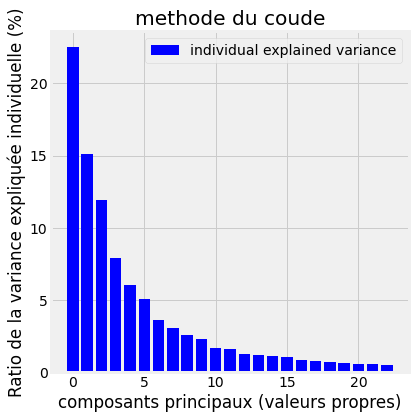

In [ ]:
''''
l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 6))
plt.bar(range(23), var_explained_fac,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.title("methode du coude")
plt.legend()
plt.tight_layout()

In [ ]:
new_eigen_vectors =new_eigen_vectors[:,sort_list[:8]]
new_eigen_values_2=[]
for i in range(8):
  new_eigen_values_2.append(new_eigen_values_1[sort_list[i]])
new_eigen_values_2

calculVariance(eig_values,new_eigen_values_2)

75.2618748411949

###7.Le nouvel axe

In [ ]:
final_fac = scaled_mfeat_fac @ new_eigen_vectors
final_fac.shape

(2000, 8)

In [ ]:
'''Affichage du nouvel axe '''
final_fac

array([[ 6.7787959 , -7.63151591,  5.50154376, ..., -2.37423027,
         1.35311859,  0.41862921],
       [ 4.75550231, -8.55026867,  3.30241962, ..., -3.62772265,
        -0.27656325,  0.64281016],
       [ 7.43552137, -8.83275339,  2.21304474, ..., -2.61281213,
         1.47710188,  2.49520706],
       ...,
       [-4.17896406, -5.86069348, -2.87097132, ..., -2.53965607,
        -3.46551665, -4.04646205],
       [-2.87632503, -8.83458082, -5.4222979 , ..., -0.45239751,
        -0.24317357, -1.81990294],
       [-9.70931137, -1.02173414,  2.39377472, ..., -4.08326685,
        -0.74396879, -0.63165393]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (fac0) et la deuxième colonne (fac1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

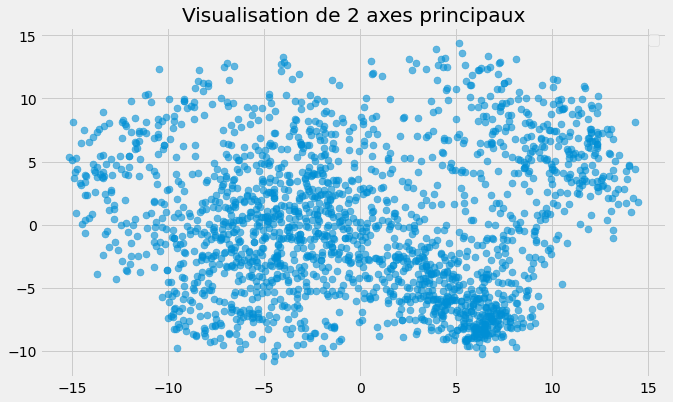

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fac[:,0], final_fac[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))

entre la 1re colonne(fac0) et la 10ème(fac9) colonne

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

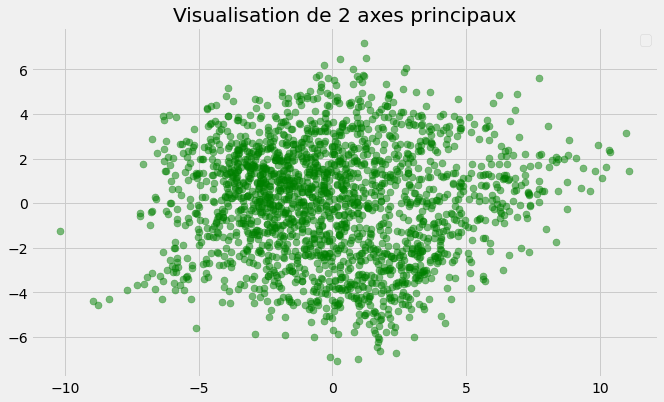

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fac[:,5], final_fac[:,7],alpha = 0.5,s=50,c="green") #La valeur de fusion alpha, entre 0 (transparent) et 1 (opaque).
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))

##**METHODE KMEANS**

###1.Choix du meilleur nombre de cluster

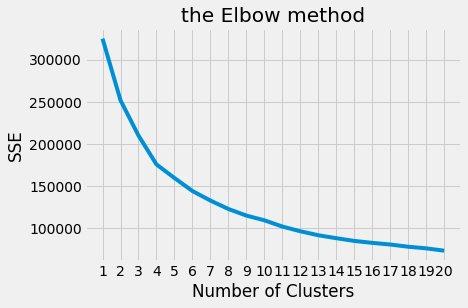

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_fac)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.title("the Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random", #choisir n_clusters des observations (lignes) au hasard à partir des données pour les centroïdes initiaux.
n_clusters=10, #Le nombre de clusters à former.
n_init=10, #Nombre de fois où l'algorithme k-means sera exécuté avec différentes graines centroïdes
max_iter=300, # Nombre maximal d'itérations de l'algorithme k-means à exécuter.
random_state=42) #Détermine la génération de nombres aléatoires pour l'initialisation du centroïde

In [ ]:
# fitting the values
kmeans.fit(final_fac)

KMeans(init='random', n_clusters=10, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)
#l'inertie est calculé en mesurant la distance entre chaque point de données et son centre de gravité

La valeur de SSE:  109465.65648117595


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

array([[  6.17420493,   5.00326527,  -7.34112071,  -1.87477977,
         -0.95772432,  -3.09449384,   0.25983966,   1.20559408],
       [  9.94365266,   5.85310885,   0.17315061,  -0.19264644,
          0.8572187 ,   0.63505979,   1.12216248,  -2.36831055],
       [ -3.53375169,   0.37566532,  -2.54546182,   4.97963278,
          5.48988749,  -0.18380609,  -1.75062059,   0.99361435],
       [ -5.47320143,  -4.9496451 ,  -1.07988417,  -5.36802993,
          0.16043802,  -0.91412202,  -0.98860351,  -0.83834878],
       [ -3.91605529,   4.05522983,   6.11382566,  -2.66900674,
          0.24594631,   1.74494596,   0.7859652 ,   0.75703424],
       [ -7.5028917 ,   7.23307705,   3.30994986,   1.13858448,
         -2.97745891,  -0.75491158,  -3.0301391 ,   0.57559115],
       [  2.82588962,  -3.55739533,   1.15053084,  -0.4881646 ,
          5.01431567,   1.67614606,  -0.77901515,   1.74541643],
       [  5.56059169,  -6.20004647,   3.6947825 ,   2.53251652,
         -2.32638371,  -0.5807959

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  22


###Obtenir les labels

In [ ]:
kmeans.labels_

array([7, 7, 7, ..., 3, 3, 3], dtype=int32)

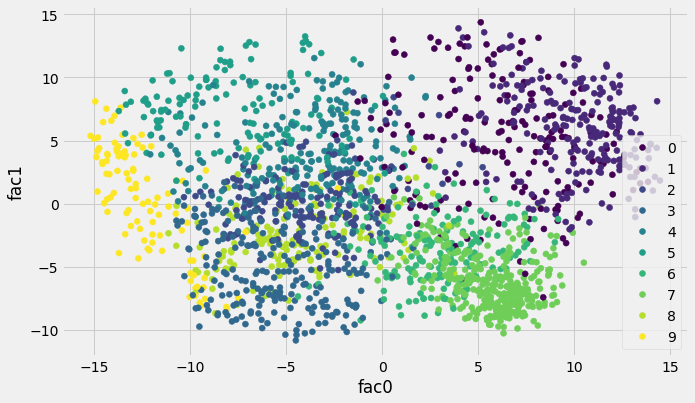

In [ ]:
# ploting the graph
plt.figure(figsize=(10,6))
scatter = plt.scatter(x= final_fac[:, 0], y=final_fac[:, 1], c= kmeans.labels_)
plt.xlabel('fac0')
plt.ylabel('fac1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5,6,7,8,9]);

###Affichage du centre des cluster

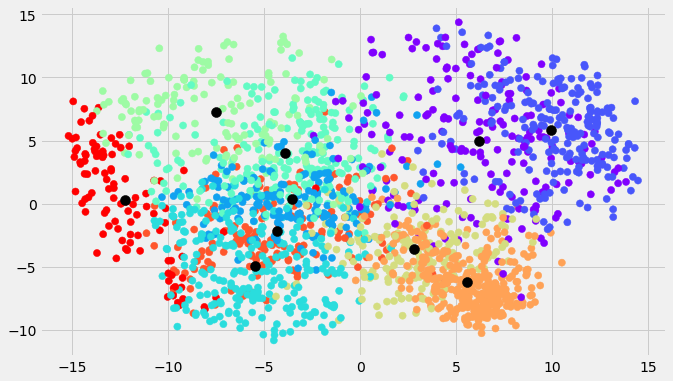

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fac[:,0], final_fac[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-FOU

In [ ]:
mfeat_fou= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-fou'
mfeat_fou= pd.read_fwf(mfeat_fou, header=None)

In [ ]:
mfeat_fou.head()

0         1         2         3         4         5         6   \
0  0.065882  0.197312  0.103826  0.270362  0.616078  0.035856  0.424572   
1  0.049142  0.175971  0.105515  0.227095  0.599280  0.041217  0.431078   
2  0.034172  0.227649  0.108766  0.127697  0.612494  0.056554  0.470639   
3  0.062336  0.217979  0.080243  0.289592  0.546316  0.045779  0.425545   
4  0.061970  0.198358  0.111239  0.253460  0.608455  0.023631  0.415246   

         7         8         9   ...        66        67        68        69  \
0  0.089701  0.367773  0.037065  ...  0.123448  0.113374  0.074343  0.281666   
1  0.096801  0.326739  0.059661  ...  0.045310  0.069337  0.045386  0.254264   
2  0.041903  0.324267  0.044569  ...  0.019858  0.218842  0.041087  0.360464   
3  0.022841  0.331454  0.119052  ...  0.083995  0.085479  0.087658  0.151880   
4  0.091866  0.309310  0.049142  ...  0.021004  0.106960  0.032283  0.248565   

         70        71        72        73        74        75  
0  0.067795  0.344182  0.038963  0.394366  0.049971  0.344871  
1  0.045447  0.335659  0.021719  0.445277  0.083978  0.354092  
2  0.047154  0.377408  0.052099  0.445029  0.071234  0.261465  
3  0.075950  0.293462  0.022675  0.408291  0.063010  0.401376  
4  0.015674  0.386276  0.039481  0.434701  0.069218  0.405403  

[5 rows x 76 columns]

In [ ]:
mfeat_fou.shape

(2000, 76)

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_fou,"fou")
mfeat_fou.head()


fou0      fou1      fou2      fou3      fou4      fou5      fou6  \
0  0.065882  0.197312  0.103826  0.270362  0.616078  0.035856  0.424572   
1  0.049142  0.175971  0.105515  0.227095  0.599280  0.041217  0.431078   
2  0.034172  0.227649  0.108766  0.127697  0.612494  0.056554  0.470639   
3  0.062336  0.217979  0.080243  0.289592  0.546316  0.045779  0.425545   
4  0.061970  0.198358  0.111239  0.253460  0.608455  0.023631  0.415246   

       fou7      fou8      fou9  ...     fou66     fou67     fou68     fou69  \
0  0.089701  0.367773  0.037065  ...  0.123448  0.113374  0.074343  0.281666   
1  0.096801  0.326739  0.059661  ...  0.045310  0.069337  0.045386  0.254264   
2  0.041903  0.324267  0.044569  ...  0.019858  0.218842  0.041087  0.360464   
3  0.022841  0.331454  0.119052  ...  0.083995  0.085479  0.087658  0.151880   
4  0.091866  0.309310  0.049142  ...  0.021004  0.106960  0.032283  0.248565   

      fou70     fou71     fou72     fou73     fou74     fou75  
0  0.067795  0.344182  0.038963  0.394366  0.049971  0.344871  
1  0.045447  0.335659  0.021719  0.445277  0.083978  0.354092  
2  0.047154  0.377408  0.052099  0.445029  0.071234  0.261465  
3  0.075950  0.293462  0.022675  0.408291  0.063010  0.401376  
4  0.015674  0.386276  0.039481  0.434701  0.069218  0.405403  

[5 rows x 76 columns]

##**METHODE ACP** 

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_fou=scaler.fit_transform(mfeat_fou)


In [ ]:
scaled_mfeat_fou

array([[-1.30245067, -1.02163771, -1.20012317, ...,  0.96643443,
        -1.09773269,  1.03419088],
       [-1.48465024, -1.14276502, -1.18787917, ...,  1.35514092,
        -0.70064333,  1.10923272],
       [-1.64759166, -0.84944988, -1.16430673, ...,  1.35324753,
        -0.84945383,  0.35541552],
       ...,
       [ 1.63332598, -0.33421707, -0.08285457, ..., -0.96360498,
        -1.2284496 , -0.83986832],
       [ 0.74411332, -1.16982877,  0.24099543, ..., -0.28603576,
        -0.47077484, -0.71444403],
       [ 0.93638811, -1.29563629, -0.26550368, ...,  0.06095674,
        -1.43514367, -1.07872483]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_fou= np.cov(scaled_mfeat_fou,rowvar=False)
cov_mfeat_fou

array([[ 1.00050025,  0.19555311,  0.43266148, ..., -0.12253453,
         0.10539477, -0.29394054],
       [ 0.19555311,  1.00050025,  0.24074263, ..., -0.13737745,
         0.33252197, -0.09629971],
       [ 0.43266148,  0.24074263,  1.00050025, ..., -0.19308768,
         0.21520741, -0.30661746],
       ...,
       [-0.12253453, -0.13737745, -0.19308768, ...,  1.00050025,
        -0.04114088,  0.67916838],
       [ 0.10539477,  0.33252197,  0.21520741, ..., -0.04114088,
         1.00050025, -0.06326943],
       [-0.29394054, -0.09629971, -0.30661746, ...,  0.67916838,
        -0.06326943,  1.00050025]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_fou)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

eig_vectors [[ 0.15046806 -0.03111664  0.20706618 ...  0.01492899 -0.03033897
   0.01403655]
 [ 0.11867826 -0.15835549  0.0453913  ...  0.01284087  0.08451019
  -0.11130255]
 [ 0.16393438 -0.05323505  0.20503115 ... -0.07082936  0.01563042
  -0.05727863]
 ...
 [-0.1466377   0.04469457  0.17032854 ...  0.05548475 -0.0938626
   0.0194451 ]
 [ 0.05500919 -0.15895535 -0.00750021 ...  0.00645582  0.0255439
   0.1916024 ]
 [-0.18172819  0.00643235  0.07526982 ...  0.00111033  0.11521261
  -0.0299337 ]]

...............

eig_values [11.87739445  5.1910036   4.7519204   2.7580267   2.53692987  2.43122751
  2.17302359  2.02116597  1.90406558  1.73318944  1.63063843  1.59045936
  1.49739335  1.44551035  1.35984002  1.33433016  1.20381087  1.12003345
  1.06858448  1.0512629   0.96831123  0.91906767  0.87505132  0.8581855
  0.84070269  0.81003894  0.78865725  0.76001047  0.74549702  0.09716239
  0.71698074  0.70331094  0.12979616  0.68369564  0.66230048  0.64682231
  0.14184372  0.15006301  0.1578

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

nombre de valeurs propres : 20

dimension : (76, 20)


###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

66.65061920711098

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 20
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[ 0.15046806, -0.03111664,  0.20706618, ..., -0.07373498,
         0.15095269, -0.15066933],
       [ 0.11867826, -0.15835549,  0.0453913 , ..., -0.0378965 ,
        -0.08854928, -0.06043822],
       [ 0.16393438, -0.05323505,  0.20503115, ..., -0.0261486 ,
         0.01202775, -0.04924969],
       ...,
       [-0.1466377 ,  0.04469457,  0.17032854, ..., -0.1106306 ,
        -0.13780401,  0.11394199],
       [ 0.05500919, -0.15895535, -0.00750021, ...,  0.0476117 ,
         0.1149406 , -0.09638697],
       [-0.18172819,  0.00643235,  0.07526982, ..., -0.04948466,
        -0.16114159,  0.17719205]])

##5.Variance expliqué

In [ ]:
variance_explained_fou = []  
for i in eig_values: 
    variance_explained_fou.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained_fou)



quantité d'informations en %

[15.620336513397836, 6.826852767051761, 6.249400574786599, 3.6271680120196717, 3.3363965885429705, 3.1973840738600185, 2.857811941760388, 2.658099194628853, 2.5040967728859433, 2.2793721701636906, 2.1445040948066114, 2.0916633334539236, 1.9692692781818257, 1.9010363070668626, 1.7883685571250374, 1.7548197312142644, 1.583169696428578, 1.472991356527435, 1.4053292001301207, 1.3825490430786067, 1.2734566776329403, 1.2086949161969818, 1.1508076245616046, 1.1286268507815793, 1.1056346582427325, 1.0653077930479957, 1.0371880497918733, 0.9995137638112028, 0.9804266753999858, 0.12778132966326364, 0.9429240084032321, 0.9249464217894715, 0.17069902439403956, 0.8991497254346806, 0.8710122782341414, 0.8506564510554088, 0.18654315856466586, 0.1973526072159022, 0.207557054257432, 0.21188409309191486, 0.22478157022326628, 0.23901799672181206, 0.8013925653578743, 0.7851036185723864, 0.2625283794116016, 0.2682023428859558, 0.7590467563160801, 0.28286729929013144, 0.2899567

##représentation graphique de la variance expliquée individuelle en % des valeurs propres sélectionnées

In [ ]:
var_explained_fou = variance_explained_fou[:20]
var_explained_fou

[15.620336513397836,
 6.826852767051761,
 6.249400574786599,
 3.6271680120196717,
 3.3363965885429705,
 3.1973840738600185,
 2.857811941760388,
 2.658099194628853,
 2.5040967728859433,
 2.2793721701636906,
 2.1445040948066114,
 2.0916633334539236,
 1.9692692781818257,
 1.9010363070668626,
 1.7883685571250374,
 1.7548197312142644,
 1.583169696428578,
 1.472991356527435,
 1.4053292001301207,
 1.3825490430786067]

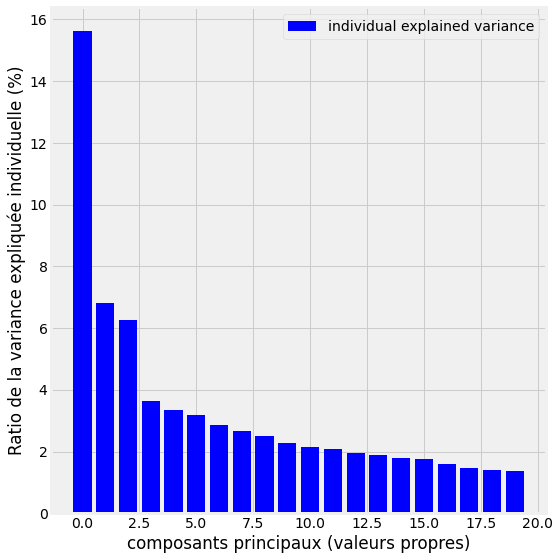

In [ ]:
''''
l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(8,8))
plt.bar(range(20), var_explained_fou,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

###7.Le nouvel axe

In [ ]:
final_fou = scaled_mfeat_fou @ eig_vectors_sorted
final_fou.shape

(2000, 20)

In [ ]:
'''Affichage du nouvel axe '''
final_fou

array([[-3.49599128,  3.47793621, -1.17321002, ...,  1.25533346,
         0.17189567,  2.5810509 ],
       [-6.10418037,  4.8616601 , -1.46004411, ...,  0.03355461,
        -0.13970694, -0.07953586],
       [-5.80788646,  4.9469388 , -0.41406823, ..., -0.01776179,
         0.49389522, -1.18483815],
       ...,
       [ 3.38308782,  3.71727628,  0.18764651, ...,  0.72900946,
        -0.92935732, -0.48770204],
       [ 1.48119561,  1.00702109,  1.60350325, ..., -0.04261656,
         0.8889018 ,  0.70766882],
       [ 0.22584946, -1.50856269,  1.34827983, ..., -0.12157647,
         0.17137633, -1.00836102]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (fou0) et la deuxième colonne (fou1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

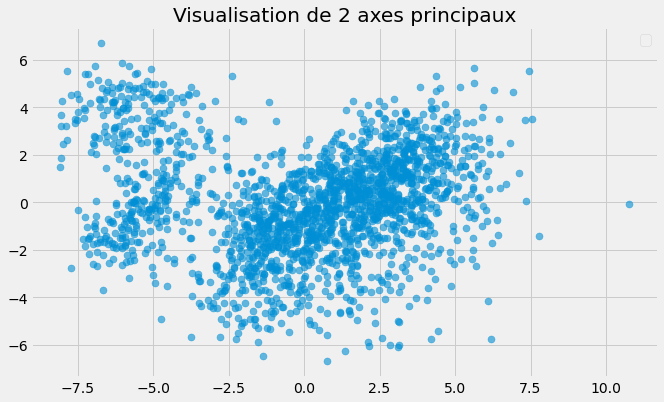

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fou[:,0], final_fou[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))

entre la 18eme colonne(fou18) et la 20ème(fou19) colonne

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

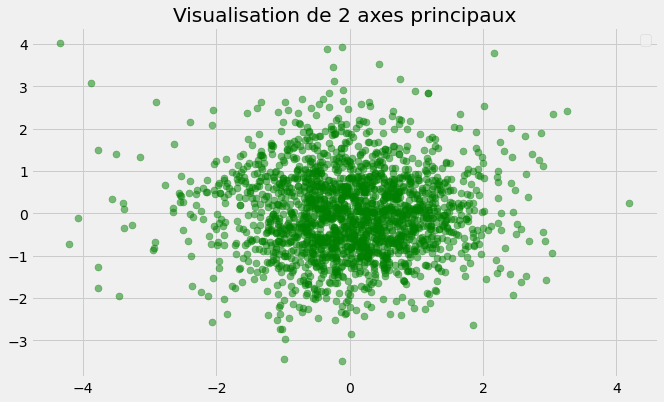

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fou[:,18], final_fou[:,19],alpha = 0.5,s=50,c="green")
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))


##**METHODE KMEANS**

###1.Choix du meilleur nombre de cluster

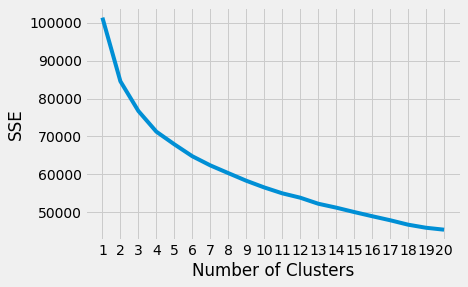

In [ ]:

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_fou)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=10,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_fou)

KMeans(init='random', n_clusters=10, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

La valeur de SSE:  56576.26425496575


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

array([[ 3.29835849e+00,  2.16283212e+00,  2.12595152e+00,
         1.95140443e+00,  1.14083087e+00, -1.47756549e+00,
        -1.01696516e+00, -6.12653938e-01, -3.26602651e-01,
         3.74059686e-01, -3.98770038e-01, -8.41580313e-01,
         7.18872843e-01, -6.12384011e-01,  1.79554247e-01,
        -4.01256421e-01, -3.69023872e-01,  2.00956012e-01,
         1.81370922e-01, -1.12231473e-01],
       [-8.79344140e-01, -9.88125129e-01,  1.44693891e+00,
        -1.26068249e+00, -3.45061531e-01, -3.01776399e-01,
        -2.63062423e-01, -5.07433743e-01,  1.51487806e-01,
         1.14640194e-01, -1.68860118e-01, -9.67876530e-02,
         3.50746745e-01,  5.18395902e-01, -2.17234176e-01,
        -2.66931471e-01,  4.60535447e-01, -1.92453895e-01,
        -2.65578726e-01,  3.79803945e-01],
       [ 4.96612952e+00,  1.13806399e+00, -8.75262875e-01,
         5.99157419e-01,  4.79342809e-01, -6.92895272e-01,
         1.33316686e+00, -2.26031568e+00, -1.12312734e-01,
         3.41420654e-02, -3.5

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  36


###Obtenir les labels

In [ ]:
kmeans.labels_

array([8, 8, 8, ..., 0, 5, 5], dtype=int32)

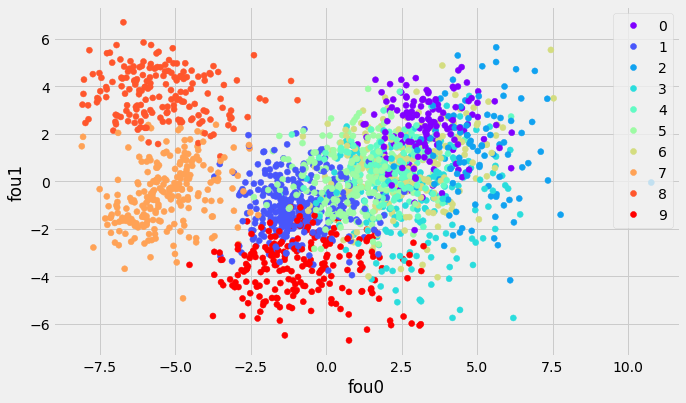

In [ ]:
# ploting the graph
plt.figure(figsize=(10,6))
scatter = plt.scatter(x= final_fou[:, 0], y=final_fou[:, 1], c= kmeans.labels_, cmap="rainbow")
plt.xlabel('fou0')
plt.ylabel('fou1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5,6,7,8,9]);

###Affichage du centre des cluster

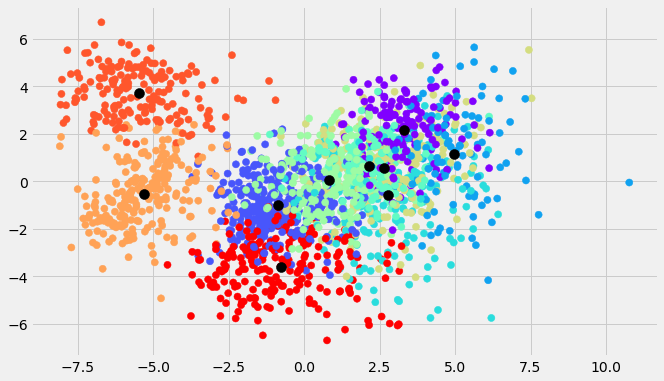

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_fou[:,0], final_fou[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-KAR

In [ ]:
mfeat_kar= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-kar'
mfeat_kar= pd.read_fwf(mfeat_kar, header=None)

In [ ]:
mfeat_kar.head()

0          1          2         3         4         5         6   \
0 -10.297008 -11.666789  11.560669 -2.081316  4.044656  4.086815 -2.558072   
1  -5.036009 -12.885333   0.161155  0.592460  3.123534  4.220469 -6.411771   
2  -9.639157  -6.655898   0.388687 -1.717650  0.300346  3.400769 -7.240785   
3  -6.650375  -7.043851   4.104350 -2.342780  3.494658  3.924822 -9.874812   
4 -10.664524 -10.974133   0.194391  0.453885  2.193088 -3.304663 -8.376592   

         7         8         9   ...        54        55        56        57  \
0 -8.476935  2.138135  3.503082  ...  1.078083  0.921927  0.496387 -0.643667   
1 -6.335328 -0.244622  1.346073  ...  0.942353  2.938791  1.429883 -2.336344   
2 -1.659405 -0.874005  4.153403  ... -0.413174 -0.023028 -0.025265  1.259838   
3 -6.556576 -1.364269  1.153308  ... -0.961236 -1.043815 -0.204508 -1.981150   
4 -4.241146  2.964818 -0.949622  ...  0.152957  1.448160 -1.254907 -3.481295   

         58        59        60        61        62        63  
0  0.284104  0.286555  0.348625  1.814691 -1.351353 -0.473910  
1  1.281628 -0.098321  0.582357  0.485792  0.642451  0.613107  
2 -0.441360 -0.960094  1.995843  1.097748  0.827182 -1.767840  
3  0.982438 -0.144233 -1.449328 -0.913552 -0.771735  0.304992  
4 -0.563889  1.529335  0.510399  0.298318 -0.943213  1.149847  

[5 rows x 64 columns]

In [ ]:
mfeat_kar.shape

(2000, 64)

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_kar,"kar")
mfeat_kar.head()


kar0       kar1       kar2      kar3      kar4      kar5      kar6  \
0 -10.297008 -11.666789  11.560669 -2.081316  4.044656  4.086815 -2.558072   
1  -5.036009 -12.885333   0.161155  0.592460  3.123534  4.220469 -6.411771   
2  -9.639157  -6.655898   0.388687 -1.717650  0.300346  3.400769 -7.240785   
3  -6.650375  -7.043851   4.104350 -2.342780  3.494658  3.924822 -9.874812   
4 -10.664524 -10.974133   0.194391  0.453885  2.193088 -3.304663 -8.376592   

       kar7      kar8      kar9  ...     kar54     kar55     kar56     kar57  \
0 -8.476935  2.138135  3.503082  ...  1.078083  0.921927  0.496387 -0.643667   
1 -6.335328 -0.244622  1.346073  ...  0.942353  2.938791  1.429883 -2.336344   
2 -1.659405 -0.874005  4.153403  ... -0.413174 -0.023028 -0.025265  1.259838   
3 -6.556576 -1.364269  1.153308  ... -0.961236 -1.043815 -0.204508 -1.981150   
4 -4.241146  2.964818 -0.949622  ...  0.152957  1.448160 -1.254907 -3.481295   

      kar58     kar59     kar60     kar61     kar62     kar63  
0  0.284104  0.286555  0.348625  1.814691 -1.351353 -0.473910  
1  1.281628 -0.098321  0.582357  0.485792  0.642451  0.613107  
2 -0.441360 -0.960094  1.995843  1.097748  0.827182 -1.767840  
3  0.982438 -0.144233 -1.449328 -0.913552 -0.771735  0.304992  
4 -0.563889  1.529335  0.510399  0.298318 -0.943213  1.149847  

[5 rows x 64 columns]

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_kar=scaler.fit_transform(mfeat_kar)


In [ ]:
scaled_mfeat_kar

array([[-1.19354001, -1.92157541,  1.79795999, ...,  2.07224197,
        -1.78357951, -0.28517412],
       [-0.50934996, -2.1347926 , -0.2929632 , ...,  0.5951963 ,
         0.45132277,  0.7765261 ],
       [-1.10798694, -1.0447846 , -0.25122886, ...,  1.2753739 ,
         0.65839276, -1.54896781],
       ...,
       [ 0.39028304, -1.56883781, -0.26423467, ..., -0.43339942,
         0.05290387, -0.23329375],
       [-0.05351061, -1.66208204, -0.5161914 , ...,  1.61711592,
         0.21936254, -0.04247747],
       [ 1.60884916, -0.92296445,  0.66194896, ...,  0.06404164,
         0.58753766,  0.21712698]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_kar= np.cov(scaled_mfeat_kar,rowvar=False)
cov_mfeat_kar

array([[ 1.00050025e+00, -4.46513351e-04,  1.96931171e-01, ...,
        -7.52134306e-02, -9.78795386e-02, -1.25628081e-01],
       [-4.46513351e-04,  1.00050025e+00, -1.29087153e-01, ...,
        -2.56126505e-01, -2.04172250e-02,  4.96276555e-02],
       [ 1.96931171e-01, -1.29087153e-01,  1.00050025e+00, ...,
        -2.21515291e-02, -1.18672732e-02, -1.45125074e-01],
       ...,
       [-7.52134306e-02, -2.56126505e-01, -2.21515291e-02, ...,
         1.00050025e+00, -1.62243510e-02,  8.04737306e-03],
       [-9.78795386e-02, -2.04172250e-02, -1.18672732e-02, ...,
        -1.62243510e-02,  1.00050025e+00, -1.02440047e-01],
       [-1.25628081e-01,  4.96276555e-02, -1.45125074e-01, ...,
         8.04737306e-03, -1.02440047e-01,  1.00050025e+00]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_kar)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

eig_vectors [[-0.15310319  0.19669977  0.11094616 ...  0.06273032  0.01426634
  -0.00032726]
 [ 0.12502594  0.00534038  0.21574869 ...  0.04402448  0.04856633
   0.05142022]
 [-0.07395639  0.25825949 -0.05091916 ... -0.05107877  0.08326129
  -0.03703586]
 ...
 [-0.03610289 -0.08871424 -0.12904238 ...  0.09452781  0.08716302
   0.14846423]
 [-0.10322093 -0.07798013  0.07636694 ... -0.09698721 -0.14554903
   0.22717961]
 [ 0.20127712 -0.05742226  0.05943326 ... -0.02138989 -0.22458268
   0.14889608]]

...............

eig_values [5.83841191 4.96978162 3.53759076 3.22646824 2.64886299 2.36666349
 2.09946116 1.91135253 1.70282041 1.52315628 1.47617037 1.41400688
 1.37926124 1.30494395 1.25181896 1.16148189 0.02159187 1.09484651
 1.07356185 1.03595657 0.05817555 1.00998214 0.96242273 0.1120584
 0.9306527  0.90878275 0.86459573 0.17607101 0.79674425 0.80161095
 0.20659732 0.77563492 0.74664951 0.72812541 0.71810368 0.69431762
 0.68718647 0.66174497 0.24727396 0.25705066 0.27046113 0.63311606

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

nombre de valeurs propres : 20

dimension : (64, 20)


###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

65.6337288129092

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 20
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[-0.15310319,  0.19669977,  0.11094616, ..., -0.04802092,
         0.10182615,  0.02413103],
       [ 0.12502594,  0.00534038,  0.21574869, ...,  0.02886419,
         0.09271245, -0.06456008],
       [-0.07395639,  0.25825949, -0.05091916, ...,  0.12071324,
        -0.06477037, -0.11743851],
       ...,
       [-0.03610289, -0.08871424, -0.12904238, ...,  0.10578349,
        -0.08209256, -0.05853218],
       [-0.10322093, -0.07798013,  0.07636694, ..., -0.06866307,
        -0.21605113,  0.15753303],
       [ 0.20127712, -0.05742226,  0.05943326, ..., -0.21044594,
         0.14342787, -0.07719875]])

##5.Variance expliqué

In [ ]:
variance_explained_kar = []  
for i in eig_values: 
    variance_explained_kar.append((i/sum(eig_values))*100) 
print("quantité d'informations en %")
print("")
print(variance_explained_kar)

quantité d'informations en %

[9.117957356949939, 7.761401131917714, 5.524721812428796, 5.038835944395036, 4.136779000351611, 3.696062740400762, 3.2787678624524217, 2.9849950816065918, 2.659326555226632, 2.378741723347394, 2.305362943579214, 2.208281052882705, 2.1540181332125963, 2.037955440856037, 1.9549891468313338, 1.813908051978437, 0.033720422165688935, 1.709842326747942, 1.6766016671828385, 1.6178728004082987, 0.0908538515866952, 1.5773080401528905, 1.503033617358015, 0.17500370058738435, 1.4534177730556421, 1.4192630592350954, 1.3502553602219411, 0.2749734002579671, 1.2442904373187191, 1.2518908504148418, 0.3226469084825624, 1.2113235959773514, 1.1660565358882995, 1.1371271073364502, 1.121475986165374, 1.0843288481858921, 1.0731919958855864, 1.0334595314655766, 0.38617237301417023, 0.40144083744114745, 0.42238421415253313, 0.9887492263659832, 0.9810967626356718, 0.4641047700260066, 0.479065107861868, 0.4816986374228543, 0.5091316830138612, 0.9396724389053552, 0.9014514822413588,

##représentation graphique de la variance expliquée individuelle en % des valeurs propres sélectionnées

In [ ]:
var_explained_kar = variance_explained_kar[:15]
var_explained_kar

[9.117957356949939,
 7.761401131917714,
 5.524721812428796,
 5.038835944395036,
 4.136779000351611,
 3.696062740400762,
 3.2787678624524217,
 2.9849950816065918,
 2.659326555226632,
 2.378741723347394,
 2.305362943579214,
 2.208281052882705,
 2.1540181332125963,
 2.037955440856037,
 1.9549891468313338]

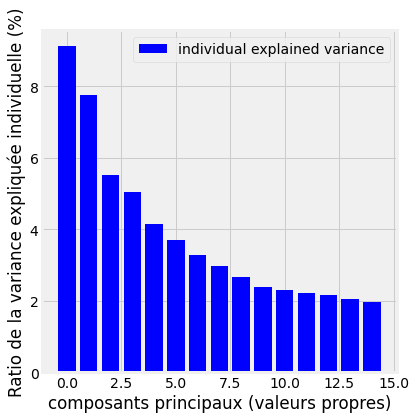

In [ ]:
''''
diagramme de l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,6))
plt.bar(range(15), var_explained_kar,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

###7.Le nouvel axe

In [ ]:
final_kar = scaled_mfeat_kar@ eig_vectors_sorted
final_kar.shape

(2000, 20)

In [ ]:
'''Affichage du nouvel axe '''
final_kar

array([[ 0.71583552,  0.61348069, -1.33536825, ..., -0.30400182,
        -0.52785212, -1.92483128],
       [ 2.03544475,  0.13758314, -0.32183426, ...,  0.18430704,
        -1.35126551, -0.26943392],
       [-1.83445857,  1.40730881, -0.28258349, ...,  2.05601213,
        -0.43261696, -0.99874582],
       ...,
       [-3.9476071 , -0.85716891, -0.48699206, ...,  0.95717726,
        -0.50585169,  0.64929784],
       [-1.08636848, -0.13264969, -0.36732108, ...,  1.08461378,
         0.54368397,  0.52012612],
       [-2.18281513,  0.44233699,  0.32072698, ..., -0.82598653,
        -0.48759142,  0.17829235]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (kar0) et la deuxième colonne (kar1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

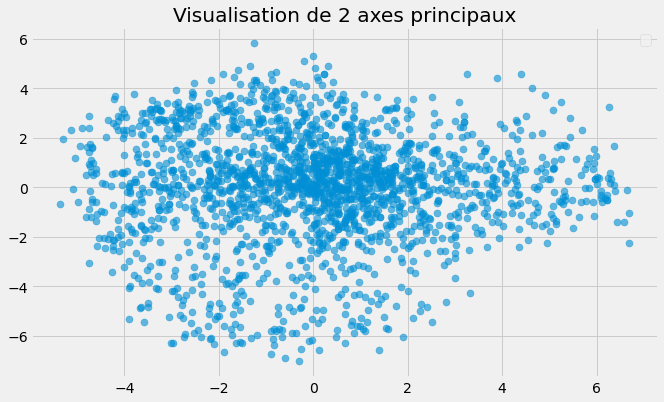

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_kar[:,0], final_kar[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()


entre la 18eme colonne(kar18) et la 19ème(kar19) colonne

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

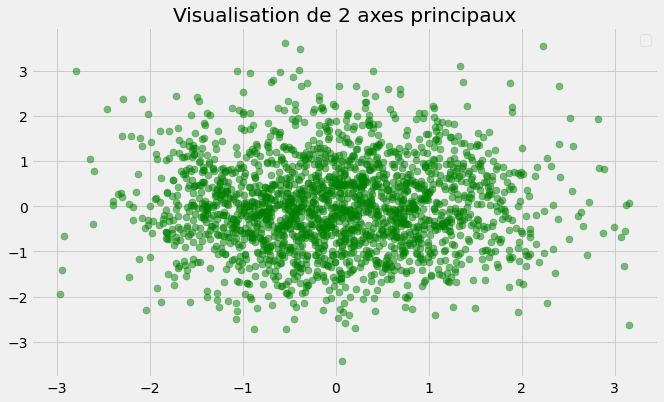

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_kar[:,18], final_kar[:,19],alpha = 0.5,s=50,c="green")
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()

#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

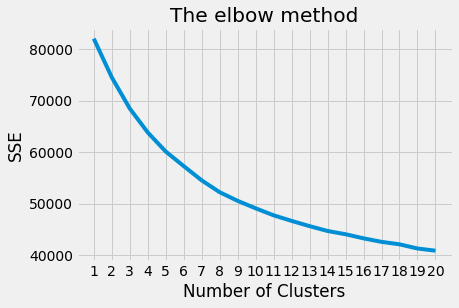

In [ ]:

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_kar)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=10,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_kar) # Calculer le clustering k-means.

KMeans(init='random', n_clusters=10, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

La valeur de SSE:  49094.72086769722


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_


array([[-9.52855037e-01, -4.61865075e+00,  1.23673232e+00,
         9.86793294e-02, -1.07418423e+00, -1.53665610e-01,
        -5.84519879e-02,  1.71858341e-01, -3.30306482e-01,
         4.01101138e-01,  1.33313705e-02,  3.69841381e-01,
        -3.97424568e-01,  2.57454677e-01,  5.36530818e-02,
        -1.69476494e-01,  3.66589294e-02, -1.28242530e-01,
        -2.58887002e-01,  1.25459588e-01],
       [ 7.60513796e-01, -1.31905049e-01, -8.65987362e-01,
         2.18052442e+00,  1.99248595e+00,  1.73412287e-01,
         1.48957518e+00,  1.27580447e+00, -8.47648416e-01,
         9.02278347e-02,  2.26875487e-01,  3.52294815e-01,
        -6.72067096e-02, -1.43652126e-01, -3.75167685e-01,
         1.32342334e-01, -1.65679525e-02,  1.41516744e-01,
        -1.38562399e-01, -1.10060051e-01],
       [ 3.95222218e-01,  5.48258899e-01, -1.94653350e+00,
        -2.13687356e+00, -6.09451884e-01,  9.12725594e-02,
         4.87674431e-01,  5.89402722e-02, -1.14908554e+00,
        -3.65459308e-01, -6.7

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  25


###Obtenir les labels

In [ ]:
kmeans.labels_

array([4, 1, 1, ..., 9, 9, 9], dtype=int32)

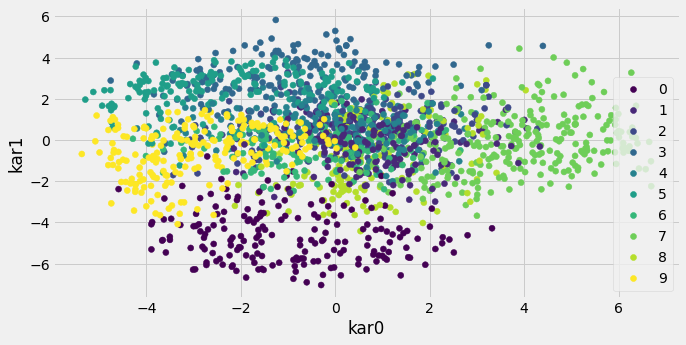

In [ ]:
# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= final_kar[:, 0], y=final_kar[:, 1], c= kmeans.labels_)
plt.xlabel('kar0')
plt.ylabel('kar1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5,6,7,8,9]);

###Affichage du centre des cluster

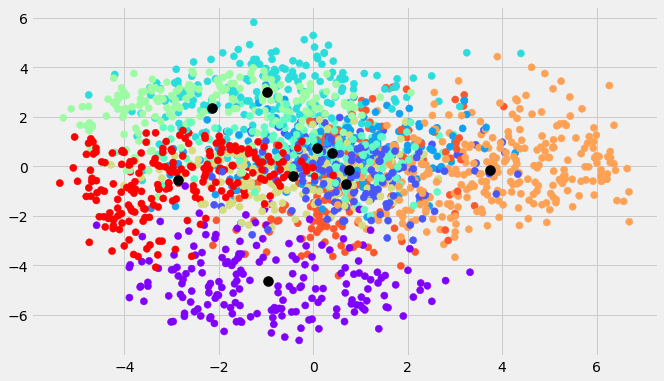

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_kar[:,0], final_kar[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-MOR

In [ ]:
mfeat_mor= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-mor'
mfeat_mor= pd.read_fwf(mfeat_mor, header=None)

In [ ]:
mfeat_mor.head(10)

mor0  mor1  mor2        mor3      mor4         mor5
0   1.0   0.0   0.0  133.150861  1.311693  1620.221779
1   1.0   0.0   0.0  126.724861  1.302745  1609.334822
2   1.0   0.0   0.0  131.173861  1.319031  1568.978435
3   1.0   0.0   0.0  129.478861  1.270878  1695.055281
4   1.0   0.0   0.0  127.262861  1.329637  1647.720235
5   1.0   0.0   0.0  131.058861  1.310403  2027.211367
6   1.0   0.0   0.0  138.442861  1.379906  1918.750472
7   1.0   0.0   0.0  129.346861  1.305646  1547.263727
8   1.0   0.0   0.0  139.542861  1.374661  1871.055934
9   1.0   0.0   0.0  132.628861  1.374434  1884.680458

In [ ]:
mfeat_mor.shape

(2000, 6)

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_mor,"mor")
mfeat_mor.head()


mor0  mor1  mor2        mor3      mor4         mor5
0   1.0   0.0   0.0  133.150861  1.311693  1620.221779
1   1.0   0.0   0.0  126.724861  1.302745  1609.334822
2   1.0   0.0   0.0  131.173861  1.319031  1568.978435
3   1.0   0.0   0.0  129.478861  1.270878  1695.055281
4   1.0   0.0   0.0  127.262861  1.329637  1647.720235

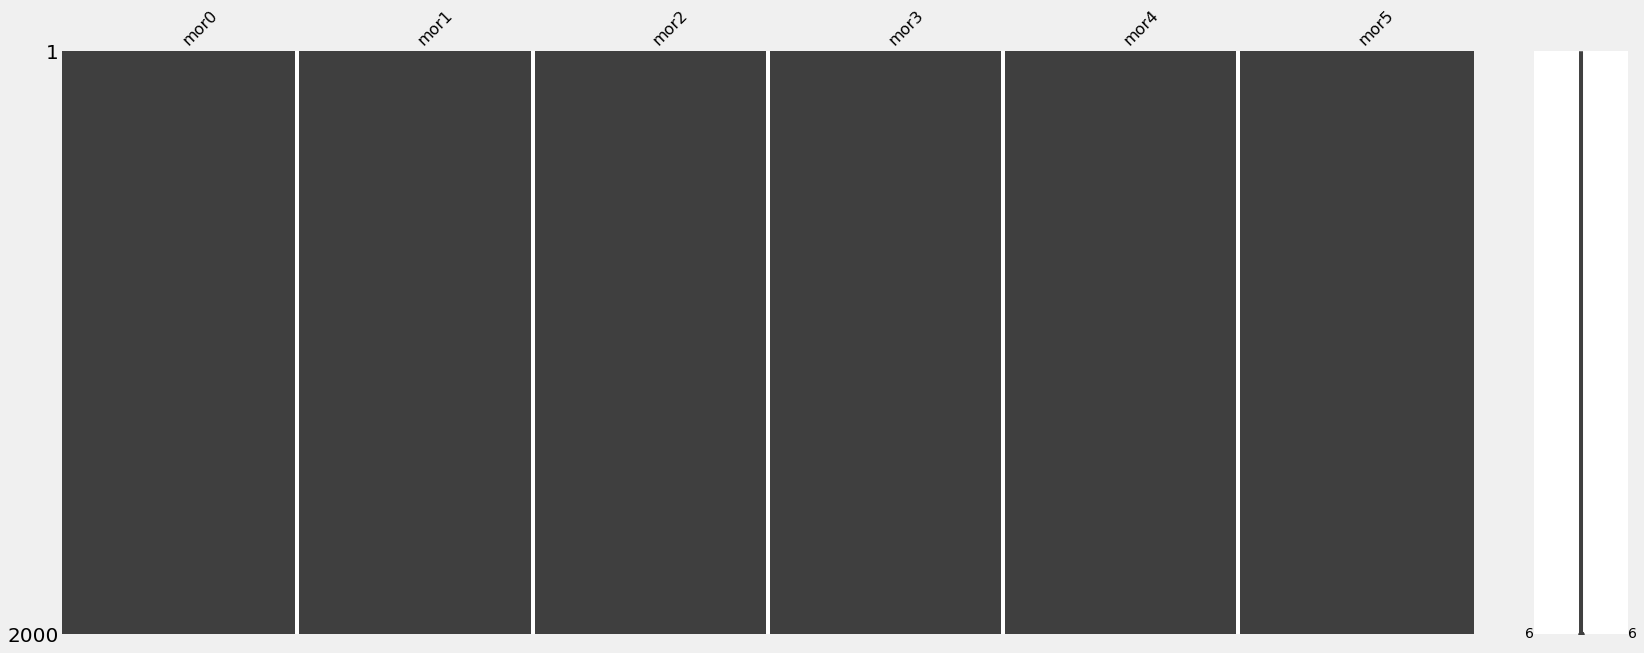

In [ ]:
missingno.matrix(mfeat_mor)

##**METHODE ACP** 

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_mor=scaler.fit_transform(mfeat_mor)


In [ ]:
scaled_mfeat_mor

array([[ 0.76340069, -1.51835049, -1.01989185, -0.93058101, -1.12578212,
        -1.01733935],
       [ 0.76340069, -1.51835049, -1.01989185, -1.18758235, -1.15650489,
        -1.02159111],
       [ 0.76340069, -1.51835049, -1.01989185, -1.00964912, -1.10058579,
        -1.03735175],
       ...,
       [ 0.76340069, -0.64246327,  0.4095291 , -0.86971016, -0.33505175,
        -0.17903648],
       [ 0.76340069, -0.64246327,  0.4095291 , -0.53959982, -0.73199323,
        -0.04173786],
       [ 0.76340069, -0.64246327,  0.4095291 , -0.89978564, -0.25733936,
        -0.16292369]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_mor= np.cov(scaled_mfeat_mor,rowvar=False)
cov_mfeat_mor

array([[ 1.00050025, -0.85056805,  0.51652134, -0.60955334, -0.66653854,
        -0.42017847],
       [-0.85056805,  1.00050025, -0.00106756,  0.61684767,  0.67512256,
         0.47225883],
       [ 0.51652134, -0.00106756,  1.00050025, -0.14390801, -0.16476398,
        -0.03221658],
       [-0.60955334,  0.61684767, -0.14390801,  1.00050025,  0.93822929,
         0.21968417],
       [-0.66653854,  0.67512256, -0.16476398,  0.93822929,  1.00050025,
         0.33702973],
       [-0.42017847,  0.47225883, -0.03221658,  0.21968417,  0.33702973,
         1.00050025]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_mor)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

eig_vectors [[ 0.48622068 -0.26070867 -0.16781786  0.40379078  0.70888142  0.04356305]
 [-0.46731845 -0.23382263  0.13147161 -0.5897947   0.60149279  0.00207037]
 [ 0.16446563 -0.8903755  -0.11830336 -0.17781069 -0.36682911 -0.00256992]
 [-0.45503877 -0.09339376 -0.47397188  0.31678997  0.02671886 -0.67712495]
 [-0.48186764 -0.10311945 -0.34101     0.32864499 -0.02018619  0.72970345]
 [-0.28088657 -0.25540835  0.77435104  0.49911437  0.00292751 -0.08441595]]

...............

eig_values [3.46648424 1.10804264 0.89377706 0.47534082 0.00576776 0.05358899]


###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

nombre de valeurs propres : 2

dimension : (6, 2)


###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

76.20399354041062

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


array([0, 1])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 2
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[ 0.48622068, -0.26070867],
       [-0.46731845, -0.23382263],
       [ 0.16446563, -0.8903755 ],
       [-0.45503877, -0.09339376],
       [-0.48186764, -0.10311945],
       [-0.28088657, -0.25540835]])

##5.Variance expliqué

In [ ]:
variance_explained_mor = []  
for i in eig_values: 
    variance_explained_mor.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained_mor)



quantité d'informations en %

[57.74584997856611, 18.458143561844516, 14.888836117790241, 7.9183857825122645, 0.09608127219276769, 0.892703287094084]


##Représentation graphique de la variance expliquée

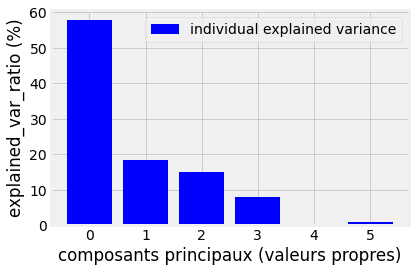

In [ ]:
''''
l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 4))
plt.bar(range(6), variance_explained_mor,color = "blue", align='center',label='individual explained variance')
plt.ylabel('explained_var_ratio (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

###7.Le nouvel axe

In [ ]:
final_mor = scaled_mfeat_mor@ eig_vectors_sorted
final_mor.shape

(2000, 2)

In [ ]:
'''Affichage du nouvel axe '''
final_mor

array([[ 2.16468263,  1.52692369],
       [ 2.29762677,  1.55518006],
       [ 2.1941416 ,  1.53682126],
       ...,
       [ 1.34626099, -0.25193414],
       [ 1.3487559 , -0.27689921],
       [ 1.31797354, -0.26125428]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (mor0) et la deuxième colonne (mor1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

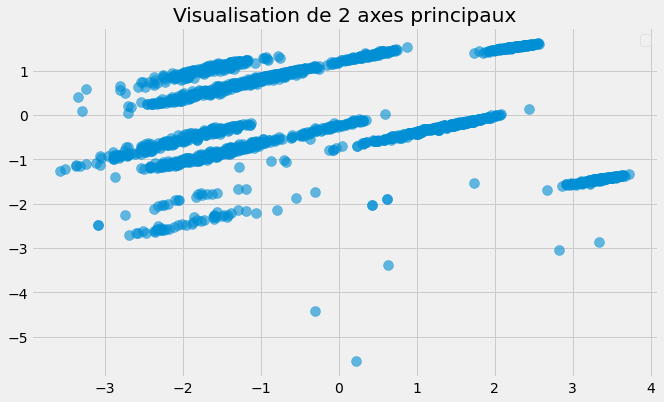

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_mor[:,0], final_mor[:,1],alpha = 0.6,s=100)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))

#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

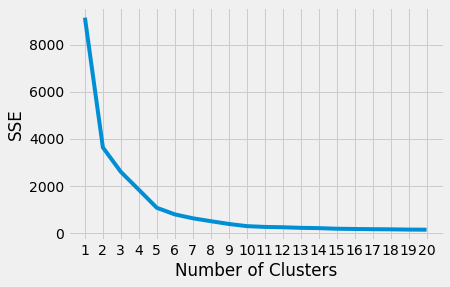

In [ ]:

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_mor)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=5,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_mor)

KMeans(init='random', n_clusters=5, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

La valeur de SSE:  1068.5641874334017


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

array([[-1.79298655, -0.94892377],
       [ 1.63811625,  1.47956234],
       [ 3.32410625, -1.46814769],
       [-1.3545416 ,  0.83513572],
       [ 1.14514626, -0.28536842]])

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  11


###Obtenir les labels

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 4, 4, 4], dtype=int32)

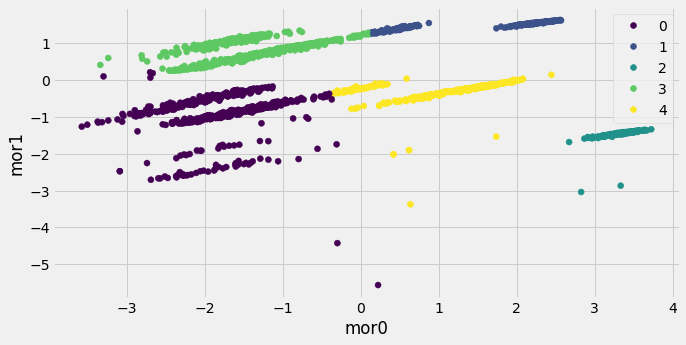

In [ ]:
# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= final_mor[:, 0], y=final_mor[:, 1], c= kmeans.labels_)
plt.xlabel('mor0')
plt.ylabel('mor1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4]);

###Affichage du centre des cluster

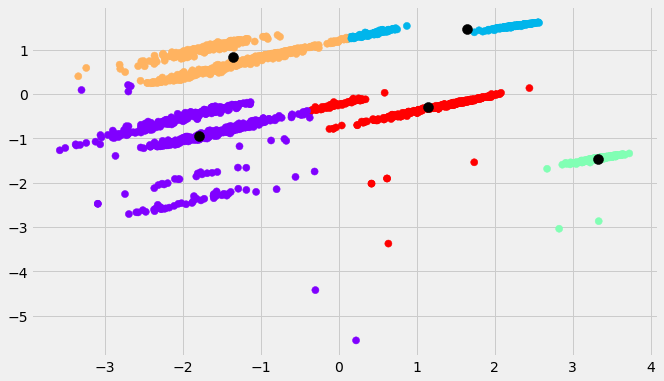

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_mor[:,0], final_mor[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-PIX 🚨🚨:

240 moyennes de pixels dans des fenêtres 2 x 3

In [ ]:
mfeat_pix= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-pix'
mfeat_pix= pd.read_fwf(mfeat_pix, header=None)

In [ ]:
mfeat_pix.head()

0    1    2    3    4    5    6    7    8    9    ...  230  231  232  233  \
0    0    3    4    4    6    6    6    6    6    5  ...    4    4    4    4   
1    0    0    0    0    0    0    1    3    4    4  ...    2    4    4    4   
2    0    0    1    4    4    4    4    4    4    3  ...    1    3    4    4   
3    0    0    3    3    2    2    4    5    6    6  ...    4    4    4    4   
4    0    0    0    0    0    0    3    4    6    6  ...    4    4    4    4   

   234  235  236  237  238  239  
0    4    3    0    0    0    0  
1    4    2    0    0    0    0  
2    4    4    4    2    1    0  
3    2    0    0    0    0    0  
4    3    1    0    0    0    0  

[5 rows x 240 columns]

In [ ]:
mfeat_pix.shape

(2000, 240)

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_pix,"pix")
mfeat_pix.head()


pix0  pix1  pix2  pix3  pix4  pix5  pix6  pix7  pix8  pix9  ...  pix230  \
0     0     3     4     4     6     6     6     6     6     5  ...       4   
1     0     0     0     0     0     0     1     3     4     4  ...       2   
2     0     0     1     4     4     4     4     4     4     3  ...       1   
3     0     0     3     3     2     2     4     5     6     6  ...       4   
4     0     0     0     0     0     0     3     4     6     6  ...       4   

   pix231  pix232  pix233  pix234  pix235  pix236  pix237  pix238  pix239  
0       4       4       4       4       3       0       0       0       0  
1       4       4       4       4       2       0       0       0       0  
2       3       4       4       4       4       4       2       1       0  
3       4       4       4       2       0       0       0       0       0  
4       4       4       4       3       1       0       0       0       0  

[5 rows x 240 columns]

##**METHODE ACP** 

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_pix=scaler.fit_transform(mfeat_pix)

In [ ]:
scaled_mfeat_pix

array([[-0.39992144,  0.78205552,  0.79366905, ..., -0.84326044,
        -0.59327435, -0.36830523],
       [-0.39992144, -0.62747681, -0.86803008, ..., -0.84326044,
        -0.59327435, -0.36830523],
       [-0.39992144, -0.62747681, -0.4526053 , ...,  0.2725324 ,
         0.05299401, -0.36830523],
       ...,
       [-0.39992144, -0.62747681, -0.86803008, ..., -0.84326044,
        -0.59327435, -0.36830523],
       [-0.39992144, -0.62747681, -0.86803008, ..., -0.84326044,
        -0.59327435, -0.36830523],
       [-0.39992144, -0.62747681, -0.4526053 , ..., -0.84326044,
        -0.59327435, -0.36830523]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_pix= np.cov(scaled_mfeat_pix,rowvar=False)
cov_mfeat_pix

array([[ 1.00050025,  0.80180664,  0.5918125 , ..., -0.12540281,
        -0.09957967, -0.05666702],
       [ 0.80180664,  1.00050025,  0.85513687, ..., -0.10506171,
        -0.08202192, -0.02079209],
       [ 0.5918125 ,  0.85513687,  1.00050025, ..., -0.06835339,
        -0.06021193,  0.00922856],
       ...,
       [-0.12540281, -0.10506171, -0.06835339, ...,  1.00050025,
         0.80585287,  0.5060112 ],
       [-0.09957967, -0.08202192, -0.06021193, ...,  0.80585287,
         1.00050025,  0.72716262],
       [-0.05666702, -0.02079209,  0.00922856, ...,  0.5060112 ,
         0.72716262,  1.00050025]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_pix)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

eig_vectors [[ 0.05886183  0.02087285  0.00620471 ...  0.05313117  0.01060125
  -0.00303452]
 [ 0.06468711  0.00883451 -0.00563452 ... -0.05623454 -0.04840432
   0.07172539]
 [ 0.06247465 -0.01874159 -0.02529565 ...  0.02864682 -0.00652661
  -0.12359877]
 ...
 [-0.0411407   0.05451421 -0.00221169 ... -0.01386451  0.01115311
   0.03314769]
 [-0.0237727   0.06359152 -0.00523179 ... -0.00917042  0.07306558
   0.02542383]
 [-0.01319738  0.04854793 -0.01362508 ... -0.01443482 -0.01027168
   0.02550487]]

...............

eig_values [3.87307579e+01 2.34459007e+01 2.10814708e+01 1.51494418e+01
 1.30779435e+01 1.02479597e+01 8.96626628e+00 7.22934531e+00
 7.11031097e+00 6.02083984e+00 4.71945207e+00 4.42704474e+00
 4.09138760e+00 3.73410936e+00 3.46149827e+00 3.14769296e+00
 2.94153706e+00 2.72278142e+00 2.48320461e+00 2.40171187e+00
 2.13693385e+00 1.94771251e+00 1.89888399e+00 1.81542670e+00
 1.63665446e+00 1.46867332e+00 1.37793043e+00 1.23242935e+00
 1.21845519e+00 1.14480712e+00 1.1206818

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

nombre de valeurs propres : 33

dimension : (240, 33)


###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

85.08911373029966

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 33
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[ 0.05886183,  0.02087285,  0.00620471, ...,  0.09618518,
         0.06693636,  0.11744797],
       [ 0.06468711,  0.00883451, -0.00563452, ...,  0.05740588,
         0.06196907,  0.09856567],
       [ 0.06247465, -0.01874159, -0.02529565, ..., -0.03297072,
         0.00447433,  0.05487548],
       ...,
       [-0.0411407 ,  0.05451421, -0.00221169, ...,  0.08215271,
        -0.02325689, -0.05718017],
       [-0.0237727 ,  0.06359152, -0.00523179, ..., -0.00094193,
        -0.00161716, -0.04713803],
       [-0.01319738,  0.04854793, -0.01362508, ..., -0.05545652,
        -0.0044166 , -0.05432469]])

##5.Variance expliqué

In [ ]:
variance_explained_pix = []  
for i in eig_values: 
    variance_explained_pix.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained_pix)

quantité d'informations en %

[16.12974686548847, 9.764240730566213, 8.779554194834763, 6.309111287708416, 5.446418532666606, 4.267848233354626, 3.7340763118678706, 3.0107210980443386, 2.96114825655986, 2.507428926072468, 1.965455144465841, 1.8436796740763115, 1.7038924621460851, 1.5551009605673263, 1.4415698000041874, 1.3108829628264655, 1.225027619908148, 1.1339250129097427, 1.0341512527600085, 1.000212922808428, 0.88994391016305, 0.8111411060351842, 0.7908060637463731, 0.7560495771786242, 0.6815983882541959, 0.6116412432181526, 0.5738506121577982, 0.5132554714081949, 0.5074358185751463, 0.4767644654238387, 0.4667172753043737, 0.46354601167584675, 0.42217153752269165, 0.3777967808373776, 0.35902015097431306, 0.35186705609145374, 0.34419215418691224, 0.3147042913603196, 0.3088062868175686, 0.30389584969151723, 0.28500635829301474, 0.27677525225857863, 0.2652383307438553, 0.24995694431421173, 0.23493321339830042, 0.22981363470040128, 0.2242252976639178, 0.21575633543869283, 0.212844811

##représentation graphique de la variance expliquée individuelle en % des valeurs propres sélectionnées

In [ ]:
var_explained_pix = variance_explained_pix[:33]
var_explained_pix

[16.12974686548847,
 9.764240730566213,
 8.779554194834763,
 6.309111287708416,
 5.446418532666606,
 4.267848233354626,
 3.7340763118678706,
 3.0107210980443386,
 2.96114825655986,
 2.507428926072468,
 1.965455144465841,
 1.8436796740763115,
 1.7038924621460851,
 1.5551009605673263,
 1.4415698000041874,
 1.3108829628264655,
 1.225027619908148,
 1.1339250129097427,
 1.0341512527600085,
 1.000212922808428,
 0.88994391016305,
 0.8111411060351842,
 0.7908060637463731,
 0.7560495771786242,
 0.6815983882541959,
 0.6116412432181526,
 0.5738506121577982,
 0.5132554714081949,
 0.5074358185751463,
 0.4767644654238387,
 0.4667172753043737,
 0.46354601167584675,
 0.42217153752269165]

##Représentation graphique de la variance expliquée

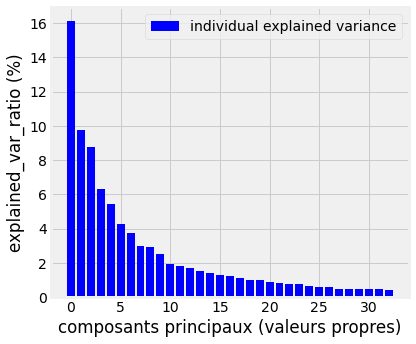

In [ ]:
''''
l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,5))
plt.bar(range(33), var_explained_pix,color = "blue", align='center',label='individual explained variance')
plt.ylabel('explained_var_ratio (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

In [ ]:
new_eigen_vectors =new_eigen_vectors[:,sort_list[:18]]
new_eigen_values_2=[]
for i in range(18):
  new_eigen_values_2.append(new_eigen_values_1[sort_list[i]])
new_eigen_values_2

calculVariance(eig_values,new_eigen_values_2)

75.08982807406774

###7.Le nouvel axe

In [ ]:
final_pix = scaled_mfeat_pix@ new_eigen_vectors
final_pix.shape

(2000, 18)

In [ ]:
'''Affichage du nouvel axe '''
final_pix

array([[ -3.10103285, -10.06290967,  -1.96540583, ...,   0.96634847,
         -1.43130531,   3.17512592],
       [ -1.12977382,  -6.76591702,   2.285528  , ...,  -2.09076863,
         -0.50367729,  -0.69882295],
       [ -4.53768304,  -6.63687661,  -0.30585241, ...,  -0.29217286,
         -0.4545107 ,  -1.99139462],
       ...,
       [  3.08642859,  -5.75825245,   2.67791539, ...,  -0.14612002,
         -0.48354729,  -3.83057926],
       [  0.6489042 ,  -6.1265371 ,   5.65341136, ...,  -2.02786501,
         -2.00728665,  -1.58554581],
       [  9.8214233 ,  -1.71469169,   1.34744814, ...,  -2.06982878,
          4.14805187,   0.61293179]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (pix0) et la deuxième colonne (pix1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

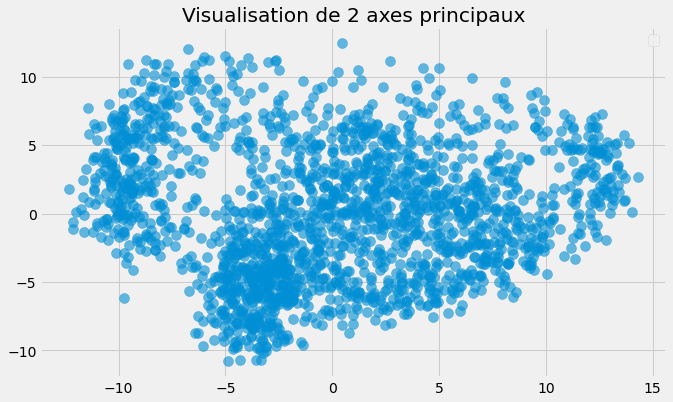

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_pix[:,0], final_pix[:,1],alpha = 0.6,s=100)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))

entre la 17 colonne (pix31) et la 18e colonne (pix17)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

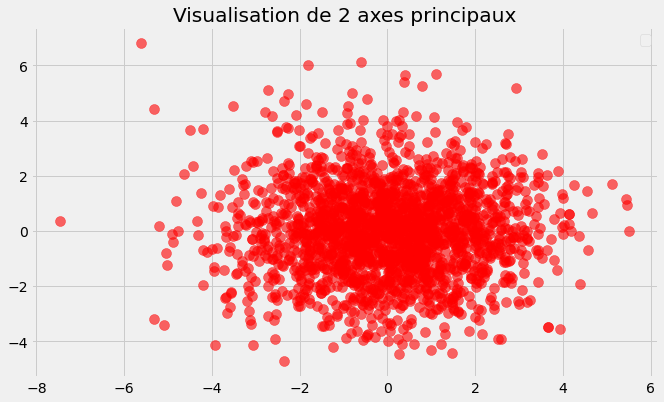

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(final_pix[:,16], final_pix[:,17],alpha = 0.6,s=100,c='red')
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))

#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

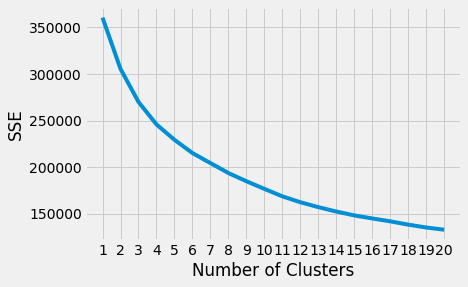

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_pix)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=9,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_pix)

KMeans(init='random', n_clusters=9, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

La valeur de SSE:  184908.04862839857


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

array([[ 5.31342342, -4.23483348,  3.68311987,  2.93341198,  1.32762779,
        -0.98013179, -0.48414527, -1.22044453,  0.60971341,  0.05350079,
        -1.3091206 , -0.34577768, -1.36201166,  0.88652191,  0.57540196,
         0.18688772,  0.11896887, -0.01797565],
       [ 5.07117001,  1.29613836, -7.44175595,  0.61550321, -1.3077611 ,
        -2.6254812 ,  1.57468445,  1.13199579,  1.06530194,  1.68389688,
         0.75490506, -0.63864849, -1.19344565, -0.18273818,  0.22669715,
         0.1996161 , -0.03480289, -0.06664491],
       [ 9.73546264,  3.80078355, -2.48062518, -0.68219248,  1.56272482,
         1.58477113, -1.76879817, -0.242355  ,  0.03953206, -0.69735876,
        -0.17429927,  0.62661636,  1.41368506,  0.25996991, -0.31127528,
        -0.65572011, -0.30738586,  0.16279644],
       [-7.22776184,  5.75506821,  1.34534675,  4.61044622,  0.5103724 ,
        -0.15552276, -2.53053877,  0.69498488, -0.07168259, -0.08769421,
        -0.67663043,  0.611931  , -0.54940582, -0.071

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  17


###Obtenir les labels

In [ ]:
kmeans.labels_

array([5, 5, 5, ..., 0, 0, 0], dtype=int32)

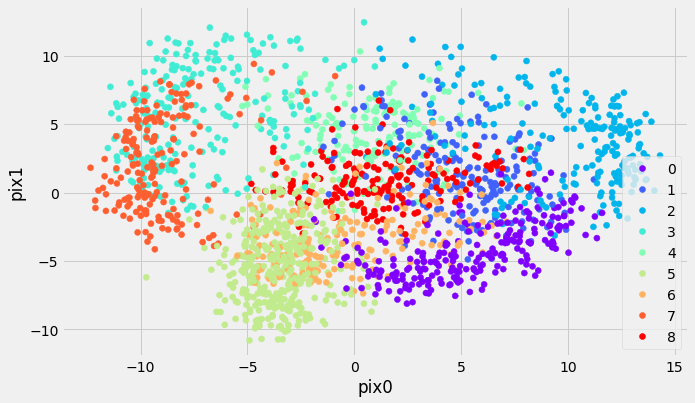

In [ ]:
# ploting the graph
plt.figure(figsize=(10,6))
scatter = plt.scatter(x= final_pix[:, 0], y=final_pix[:, 1], c= kmeans.labels_,cmap="rainbow")
plt.xlabel('pix0')
plt.ylabel('pix1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4,5,6,7,8]);

###Affichage du centre des cluster

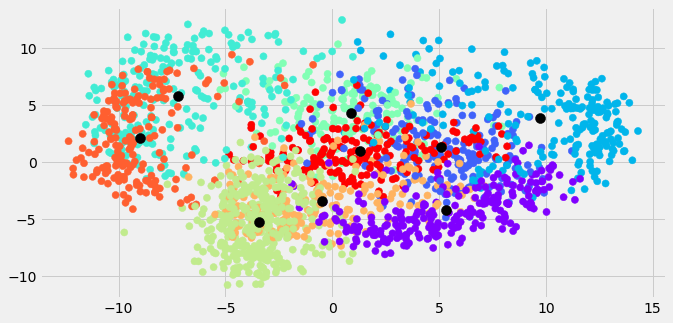

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_pix[:,0], final_pix[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

###JEU DE DONNEES MFEAT-ZER 🚨🚨

In [ ]:
mfeat_zer= '/content/drive/MyDrive/apprentissage_non_supervise/projet/mfeat-zer'
mfeat_zer= pd.read_fwf(mfeat_zer, header=None)

In [ ]:
mfeat_zer.head()

0         1          2          3           4           5   \
0  0.011033  0.831466  15.351804  75.806559  171.554214  490.156556   
1  0.038271  1.166746  10.526913  42.369276   85.187116  420.360566   
2  0.042698  1.225007   8.273804  31.744786   54.448177  404.103204   
3  0.032418  1.638247  19.205283  51.196682   57.181760  429.052011   
4  0.015866  0.611561   8.627839  37.325052   48.509025  459.909634   

           6         7         8          9   ...        37         38  \
0  206.416027  0.122135  2.601646  11.472709  ...  1.713529  33.810340   
1  253.569574  0.033657  0.390566  11.700830  ...  2.590208  35.400531   
2  389.980746  0.041733  0.937399  11.629045  ...  1.476285  19.477230   
3  256.174645  0.073624  1.973268  13.057108  ...  1.349613  14.179518   
4  238.572767  0.046477  1.117292  10.012169  ...  0.667971   8.705403   

          39        40          41          42        43         44  \
0   9.858915  1.399891  148.138058  326.239452  9.711070  20.007248   
1  70.681899  6.674412  155.135985  377.832675  8.140633  44.536711   
2  30.093590  7.858211  150.126419  419.565747  4.530921  26.292170   
3  30.564085  7.097728  173.840759  441.350376  3.706023  13.432311   
4  30.242473  9.015714  167.021185  332.479997  1.806273  23.689300   

          45          46  
0  47.032578  539.208457  
1  46.338954  518.496567  
2  44.574822  549.912691  
3  51.739930  574.887814  
4  50.407770  492.227513  

[5 rows x 47 columns]

In [ ]:
mfeat_zer.shape

(2000, 47)

###RENOMMAGE DES NOMS DE COLONNES

In [ ]:
def renommerAttributs(data,name):
  nomAttributs=[]
  for i in range(data.shape[1]):
    i=str(i)
    nomAttributs.append(name+i)
  data.columns=nomAttributs

In [ ]:
renommerAttributs(mfeat_zer,"zer")
mfeat_zer.head()


zer0      zer1       zer2       zer3        zer4        zer5  \
0  0.011033  0.831466  15.351804  75.806559  171.554214  490.156556   
1  0.038271  1.166746  10.526913  42.369276   85.187116  420.360566   
2  0.042698  1.225007   8.273804  31.744786   54.448177  404.103204   
3  0.032418  1.638247  19.205283  51.196682   57.181760  429.052011   
4  0.015866  0.611561   8.627839  37.325052   48.509025  459.909634   

         zer6      zer7      zer8       zer9  ...     zer37      zer38  \
0  206.416027  0.122135  2.601646  11.472709  ...  1.713529  33.810340   
1  253.569574  0.033657  0.390566  11.700830  ...  2.590208  35.400531   
2  389.980746  0.041733  0.937399  11.629045  ...  1.476285  19.477230   
3  256.174645  0.073624  1.973268  13.057108  ...  1.349613  14.179518   
4  238.572767  0.046477  1.117292  10.012169  ...  0.667971   8.705403   

       zer39     zer40       zer41       zer42     zer43      zer44  \
0   9.858915  1.399891  148.138058  326.239452  9.711070  20.007248   
1  70.681899  6.674412  155.135985  377.832675  8.140633  44.536711   
2  30.093590  7.858211  150.126419  419.565747  4.530921  26.292170   
3  30.564085  7.097728  173.840759  441.350376  3.706023  13.432311   
4  30.242473  9.015714  167.021185  332.479997  1.806273  23.689300   

       zer45       zer46  
0  47.032578  539.208457  
1  46.338954  518.496567  
2  44.574822  549.912691  
3  51.739930  574.887814  
4  50.407770  492.227513  

[5 rows x 47 columns]

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat_zer=scaler.fit_transform(mfeat_zer)

In [ ]:
scaled_mfeat_zer

array([[-1.01482157e+00, -8.04903651e-01, -5.42075781e-01, ...,
        -9.11920558e-01, -6.78676722e-01,  4.26901930e-01],
       [-6.05445275e-01, -5.15614723e-01, -9.53548893e-01, ...,
        -7.02276093e-04, -7.40677925e-01,  1.35145203e-01],
       [-5.38899008e-01, -4.65344635e-01, -1.14569711e+00, ...,
        -6.78448854e-01, -8.98369069e-01,  5.77686439e-01],
       ...,
       [-8.17012169e-01, -8.44797818e-01, -1.01106906e+00, ...,
        -1.60046481e+00, -1.57421989e+00, -1.10378798e+00],
       [-1.02965699e+00, -1.31681918e+00, -1.74167172e+00, ...,
        -6.63876962e-01, -1.20409528e+00,  8.80735035e-01],
       [-7.33652286e-01, -8.52033266e-01, -1.01299140e+00, ...,
         5.75407308e-01, -9.80694704e-01, -1.41894303e+00]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat_zer= np.cov(scaled_mfeat_zer,rowvar=False)
cov_mfeat_zer

array([[ 1.00050025,  0.58251975,  0.58715026, ...,  0.06663747,
         0.3682263 , -0.35931972],
       [ 0.58251975,  1.00050025,  0.62682701, ...,  0.03145942,
         0.2221275 , -0.29567512],
       [ 0.58715026,  0.62682701,  1.00050025, ...,  0.08865873,
         0.41449373, -0.28817653],
       ...,
       [ 0.06663747,  0.03145942,  0.08865873, ...,  1.00050025,
         0.00808591, -0.09049845],
       [ 0.3682263 ,  0.2221275 ,  0.41449373, ...,  0.00808591,
         1.00050025, -0.05971881],
       [-0.35931972, -0.29567512, -0.28817653, ..., -0.09049845,
        -0.05971881,  1.00050025]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat_zer)
print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 

eig_vectors [[ 2.37917250e-01  2.65058206e-02  4.99865804e-04 ... -1.47441311e-03
   1.07254445e-03  9.22128507e-05]
 [ 1.80097151e-01  1.16572957e-01 -1.05677693e-01 ... -6.60040792e-03
  -1.32603046e-02 -8.62243494e-04]
 [ 2.14750910e-01  1.44726539e-01 -1.48071985e-01 ...  3.00679357e-02
  -3.01632959e-01  7.13829868e-02]
 ...
 [ 4.56507228e-02 -6.75789145e-02 -2.32788741e-02 ... -1.34948316e-04
  -5.62764106e-05 -1.22148965e-04]
 [ 1.29357738e-01  1.60783750e-01  1.99540794e-01 ...  2.79350111e-02
   1.04804740e-01  5.02236260e-01]
 [-1.45816680e-01 -1.62682139e-02 -1.73601852e-01 ...  3.07874689e-03
  -9.58984275e-04  3.59158760e-03]]

...............

eig_values [1.13945837e+01 6.96712057e+00 4.32701800e+00 3.81117981e+00
 2.70585900e+00 2.15536489e+00 1.69149347e+00 1.49684757e+00
 1.28930787e+00 1.19481576e+00 1.11639050e+00 9.99333930e-01
 9.15397513e-01 8.67330727e-01 7.96760756e-01 6.66583572e-01
 5.85928286e-01 5.60411956e-01 5.15918072e-01 4.54115199e-01
 4.31856892e-01 3.

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

nombre de valeurs propres : 11

dimension : (47, 11)


###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

81.12958759223247

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 11
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[ 2.37917250e-01,  2.65058206e-02,  4.99865804e-04,
        -8.73287761e-02,  1.03926981e-02, -6.79271442e-02,
        -9.46575432e-02,  1.52500709e-01,  2.30165827e-02,
        -1.14512684e-01, -5.83832051e-02],
       [ 1.80097151e-01,  1.16572957e-01, -1.05677693e-01,
         4.53848453e-02,  7.28368694e-02,  1.03857018e-01,
        -3.28012014e-01,  2.71142847e-01,  5.50013488e-02,
        -3.76612610e-03, -2.62917699e-01],
       [ 2.14750910e-01,  1.44726539e-01, -1.48071985e-01,
        -1.48426841e-01, -8.81523493e-02,  1.08396229e-01,
        -2.61823031e-02,  2.20516716e-02,  2.70641487e-02,
         3.31876659e-02, -4.19300429e-02],
       [ 1.56861388e-01,  1.40398903e-01, -2.25828018e-01,
        -1.69206203e-01,  4.20604925e-02,  2.20926893e-02,
         2.99464841e-01, -3.14935074e-02, -4.05158246e-02,
        -5.51264286e-02,  1.01785442e-01],
       [ 8.26638846e-02,  1.37614211e-01, -8.69869220e-02,
         4.45873166e-02,  2.10341197e-01, -1.69779071e-01,
  

##5.Variance expliqué

In [ ]:
variance_explained_zer = []  
for i in eig_values: 
    variance_explained_zer.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained_zer)


quantité d'informations en %

[24.231673255299388, 14.816248959987693, 9.20181806883348, 8.10483876244369, 5.75426823564173, 4.583589808894384, 3.5971228134163042, 3.1831896709471494, 2.741836628806261, 2.54089010298007, 2.3741112849823267, 2.125179282045622, 1.9466804561958242, 1.844461833606752, 1.6943880321835696, 1.4175537884940783, 1.2460326002980586, 1.1917696811765004, 1.0971491764501398, 0.965719448955241, 0.9183850293029098, 0.7714103051191641, 0.7308840838610453, 0.577199458925467, 0.4778859202903273, 0.41753463927930656, 0.3324158318143328, 0.20287477531610773, 0.18477885476929148, 0.15135721372342484, 0.12998811195831061, 0.10888087265209265, 0.08938304092982202, 0.07601168743950462, 0.061301029304240306, 0.0460236793439957, 0.019189769091934983, 0.015203662871257542, 0.009750657007594919, 0.007428910250684818, 0.006395345966411374, 0.005184018042515681, 0.0015877670583339088, 0.00027539776725164154, 0.0001007894903181716, 1.2829458965908971e-05, 3.4427327138411427e-05]


##représentation graphique de la variance expliquée individuelle en % des valeurs propres sélectionnées

In [ ]:
var_explained_zer = variance_explained_zer[:11]
var_explained_zer

[24.231673255299388,
 14.816248959987693,
 9.20181806883348,
 8.10483876244369,
 5.75426823564173,
 4.583589808894384,
 3.5971228134163042,
 3.1831896709471494,
 2.741836628806261,
 2.54089010298007,
 2.3741112849823267]

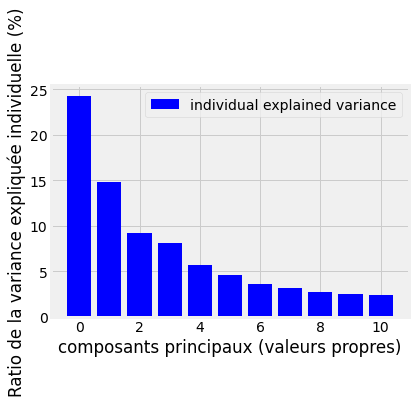

In [ ]:
''''
diagramme de l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,5))
plt.bar(range(11), var_explained_zer,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

###7.Le nouvel axe

In [ ]:
final_zer = scaled_mfeat_zer@ eig_vectors_sorted
final_zer.shape

(2000, 11)

In [ ]:
'''Affichage du nouvel axe '''
final_zer

array([[-4.77279772,  2.08096753, -0.64787548, ..., -0.13857518,
        -0.76851523,  0.92971459],
       [-4.48127779,  0.86456912,  0.01271622, ..., -2.09314251,
         0.02316121, -0.87175855],
       [-5.30504155,  2.69105071,  0.21822583, ..., -2.87484465,
        -0.30101023,  0.45146885],
       ...,
       [-3.46366928, -1.18998291,  0.45514606, ...,  0.54641177,
         0.76947648,  0.37139378],
       [-5.58779348, -3.51289644, -1.16719272, ...,  0.23868687,
         1.09624259, -1.18456746],
       [-2.28230516, -2.09467637,  2.43636633, ..., -0.40011242,
         1.05424505,  0.73368706]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne (zer0) et la deuxième colonne (zer1)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

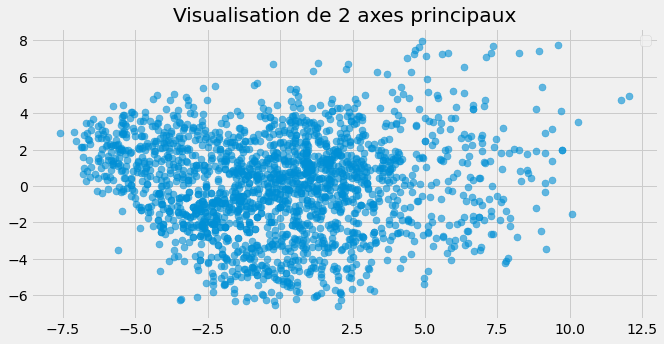

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_zer[:,0], final_zer[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()


entre la 10e colonne(zer9) et la 11ème(zer10) colonne

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

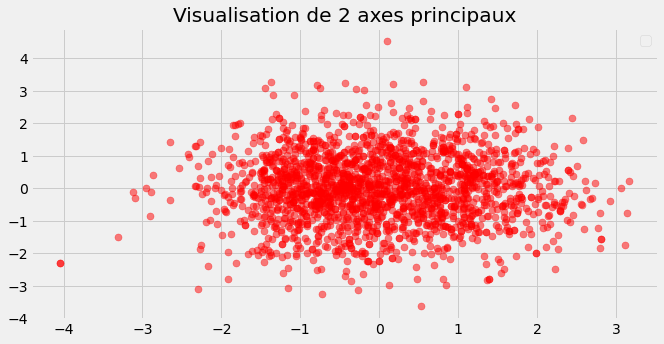

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_zer[:,9], final_zer[:,10],alpha = 0.5,s=50,c="red")
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()

#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

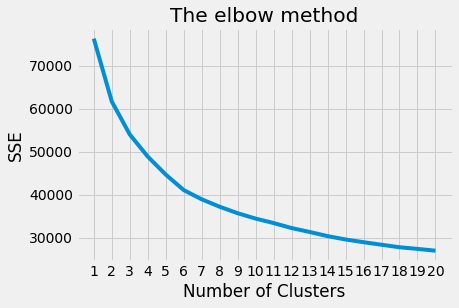

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_zer)
  sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=10,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_zer)

KMeans(init='random', n_clusters=10, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

La valeur de SSE:  34429.947589877935


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

array([[ 0.93148354,  1.79136956,  0.02702553, -1.45759815, -1.79036923,
         0.39193278,  0.2719795 ,  0.06850203,  0.39058108,  0.55085316,
         0.22356019],
       [-0.89571023, -3.18197202, -1.95329037,  3.07115897, -1.94425162,
        -1.12226531,  0.15278195, -0.78295785,  0.22305737, -0.48622101,
        -0.67563344],
       [-3.87529506,  0.80767467,  0.329243  ,  0.49722465, -0.44229121,
         0.06171347,  0.45108782,  0.09763699,  0.28678582, -0.24366148,
        -0.1413282 ],
       [-1.89324357, -1.94388815,  1.06750622,  0.18138125,  0.76450139,
         0.80994528,  0.39595611,  0.17861797,  0.15190169,  0.336473  ,
         0.13472214],
       [ 5.41432428,  3.77257748, -2.41950129,  1.77220163,  0.99397609,
         0.06966354,  0.04618232,  0.29169647, -0.29057536, -0.49827631,
        -0.10206812],
       [ 1.29348268, -0.33267737, -1.88388185, -0.41996079,  1.31943118,
         0.14530687,  0.65951862, -0.83220335, -0.13918142,  0.3235862 ,
         0.093

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  47


###Obtenir les labels

In [ ]:
kmeans.labels_

array([7, 7, 7, ..., 3, 3, 3], dtype=int32)

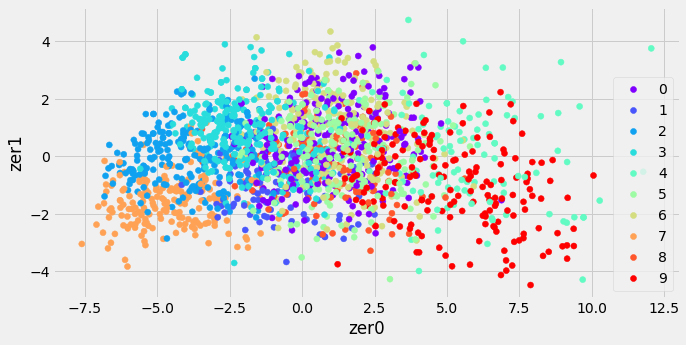

In [ ]:
# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= final_zer[:, 0], y=final_zer[:, 5], c= kmeans.labels_,cmap="rainbow")
plt.xlabel('zer0')
plt.ylabel('zer1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5,6,7,8,9]);

###Affichage du centre des cluster

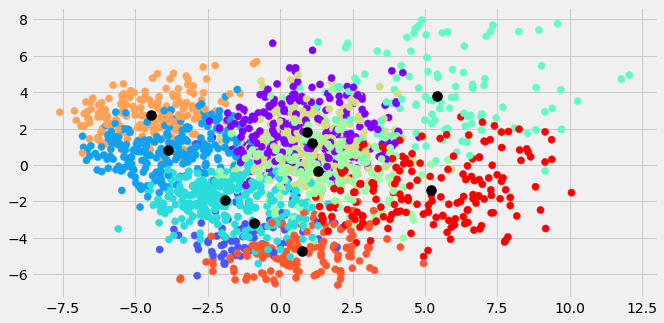

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_zer[:,0], final_zer[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

#**CONCATENATION DES 6 DATASETS**

In [ ]:
mfeat = pd.concat([mfeat_fac, mfeat_fou, mfeat_kar, mfeat_mor, mfeat_pix, mfeat_zer], axis = 1)

In [ ]:
mfeat

fac0  fac1  fac2  fac3  fac4  fac5  fac6  fac7  fac8  fac9  ...  \
0       98   236   531   673   607   647     2     9     3     6  ...   
1      121   193   607   611   585   665     7     9     2     4  ...   
2      115   141   590   605   557   627    12     6     3     3  ...   
3       90   122   627   692   607   642     0     6     4     5  ...   
4      157   167   681   666   587   666     8     6     1     4  ...   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1995   304   242   927   626   564   674    25    17     0     7  ...   
1996   324   330   919   713   609   693    28    16     8     9  ...   
1997   337   299   852   724   581   660    22    14    10    10  ...   
1998   247   261   866   633   565   615    24    15     2     4  ...   
1999   355   379   867   826   638   738    27    20    16     5  ...   

         zer37      zer38      zer39     zer40       zer41       zer42  \
0     1.713529  33.810340   9.858915  1.399891  148.138058  326.239452   
1     2.590208  35.400531  70.681899  6.674412  155.135985  377.832675   
2     1.476285  19.477230  30.093590  7.858211  150.126419  419.565747   
3     1.349613  14.179518  30.564085  7.097728  173.840759  441.350376   
4     0.667971   8.705403  30.242473  9.015714  167.021185  332.479997   
...        ...        ...        ...       ...         ...         ...   
1995  2.289602  37.077931  29.878330  6.376995  144.500902  393.876660   
1996  2.230959   8.122498  24.796064  7.282318  187.335473  353.453408   
1997  2.592315  23.227692  22.971707  6.250161  124.337857  359.585224   
1998  3.369291  69.833696  75.418772  3.563793  140.067305  486.688709   
1999  2.849961   6.117196  82.716876  5.031251  148.447749  336.818514   

          zer43      zer44      zer45       zer46  
0      9.711070  20.007248  47.032578  539.208457  
1      8.140633  44.536711  46.338954  518.496567  
2      4.530921  26.292170  44.574822  549.912691  
3      3.706023  13.432311  51.739930  574.887814  
4      1.806273  23.689300  50.407770  492.227513  
...         ...        ...        ...         ...  
1995   8.672527  52.791625  43.559482  501.537544  
1996   1.389084  61.716981  53.922259  482.428339  
1997   4.643621   1.472040  37.013903  430.544358  
1998  16.109266  26.684436  41.154583  571.426195  
1999   3.125481  60.045243  43.653824  408.171415  

[2000 rows x 649 columns]

In [ ]:
mfeat.shape

(2000, 649)

###1.Normalisation des données

In [ ]:
scaler=StandardScaler()
scaled_mfeat=scaler.fit_transform(mfeat)

In [ ]:
scaled_mfeat_kar

array([[-1.19354001, -1.92157541,  1.79795999, ...,  2.07224197,
        -1.78357951, -0.28517412],
       [-0.50934996, -2.1347926 , -0.2929632 , ...,  0.5951963 ,
         0.45132277,  0.7765261 ],
       [-1.10798694, -1.0447846 , -0.25122886, ...,  1.2753739 ,
         0.65839276, -1.54896781],
       ...,
       [ 0.39028304, -1.56883781, -0.26423467, ..., -0.43339942,
         0.05290387, -0.23329375],
       [-0.05351061, -1.66208204, -0.5161914 , ...,  1.61711592,
         0.21936254, -0.04247747],
       [ 1.60884916, -0.92296445,  0.66194896, ...,  0.06404164,
         0.58753766,  0.21712698]])

##2.Calculer la matrice de covariance

In [ ]:
cov_mfeat= np.cov(scaled_mfeat,rowvar=False)
cov_mfeat

array([[ 1.00050025,  0.50381622,  0.55326376, ...,  0.18318168,
        -0.12921459, -0.68551665],
       [ 0.50381622,  1.00050025,  0.63377375, ...,  0.17480377,
         0.17476596, -0.36177737],
       [ 0.55326376,  0.63377375,  1.00050025, ...,  0.1669758 ,
         0.05746872, -0.46216772],
       ...,
       [ 0.18318168,  0.17480377,  0.1669758 , ...,  1.00050025,
         0.00808591, -0.09049845],
       [-0.12921459,  0.17476596,  0.05746872, ...,  0.00808591,
         1.00050025, -0.05971881],
       [-0.68551665, -0.36177737, -0.46216772, ..., -0.09049845,
        -0.05971881,  1.00050025]])

##3.Calculer les vecteurs propres

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov_mfeat)

eig_values = eig_values.real
eig_vectors = eig_vectors.real

print("eig_vectors", eig_vectors)
print("")
print("...............")
print("")
print("eig_values", eig_values) 



eig_vectors [[-3.64596592e-02  6.86080986e-02 -1.17585151e-02 ...  1.29244479e-13
   1.29244479e-13  4.19956157e-14]
 [-6.50736037e-02  7.84601626e-02 -1.53187569e-02 ... -9.47551980e-14
  -9.47551980e-14 -1.82491369e-14]
 [-6.72884928e-02  4.06031458e-02 -6.87650310e-02 ...  4.91336585e-13
   4.91336585e-13 -4.11375251e-13]
 ...
 [-1.17999382e-02  1.78118205e-02 -1.21876188e-02 ...  1.33273525e-14
   1.33273525e-14  4.41898216e-15]
 [-5.09041092e-02 -1.42212214e-02  6.56760044e-02 ...  9.13030607e-12
   9.13030607e-12  2.64951783e-12]
 [ 4.02145017e-02 -3.90836942e-02 -3.16311430e-02 ... -3.01998189e-12
  -3.01998189e-12 -7.57797198e-13]]

...............

eig_values [ 9.55385314e+01  6.46373532e+01  5.44859794e+01  3.62597744e+01
  3.10716654e+01  2.49331600e+01  2.17504134e+01  1.72656131e+01
  1.50580361e+01  1.42303130e+01  1.12640398e+01  1.02118087e+01
  8.98014145e+00  7.78433841e+00  7.68341382e+00  7.41115068e+00
  6.38342450e+00  6.25060954e+00  5.48214917e+00  4.92293022e+0

###La regle de kaiser

In [ ]:
new_eigen_values_1= []
new_eigen_vectors= []
for i in range(eig_values.shape[0]):
  if eig_values[i]>1:
    new_eigen_values_1.append(eig_values[i])
    new_eigen_vectors.append(eig_vectors[:,i])
new_eigen_vectors=np.array(new_eigen_vectors).T
print("nombre de valeurs propres :",new_eigen_vectors.shape[1])
print("")
print("dimension :",new_eigen_vectors.shape)

nombre de valeurs propres : 79

dimension : (649, 79)


###La variance en %

In [ ]:
def calculVariance(old_eigen_values,new_eigen_values):
  variance=(sum(new_eigen_values)*100)/sum(old_eigen_values)
  return variance

calculVariance(eig_values,new_eigen_values_1)

87.61853343764167

##Tri des valeurs propres

In [ ]:
sort_list = np.argsort(new_eigen_values_1) [::-1]
sort_list


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 47, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

###Sélection des vecteurs propres dans l'ordre décroissant

le choix a été fait grace à la règle de Kaiser

on
retiendra les axes pour lesquels leurs valeurs propres sont supérieures ou égales à 1

In [ ]:
nbre_eig_values = 79
eig_vectors_sorted = eig_vectors[:, sort_list[:nbre_eig_values]]#sort_list[:le nombre de vecteurs propres à considérer]
eig_vectors_sorted

array([[-0.03645966,  0.0686081 , -0.01175852, ..., -0.00542191,
         0.03797424,  0.02684551],
       [-0.0650736 ,  0.07846016, -0.01531876, ..., -0.00773052,
        -0.00399703,  0.01154818],
       [-0.06728849,  0.04060315, -0.06876503, ...,  0.00875442,
         0.00432961,  0.00526625],
       ...,
       [-0.01179994,  0.01781182, -0.01218762, ..., -0.16487308,
        -0.07872691, -0.02600756],
       [-0.05090411, -0.01422122,  0.065676  , ...,  0.02340505,
         0.00023636, -0.01021394],
       [ 0.0402145 , -0.03908369, -0.03163114, ...,  0.00864737,
        -0.01975857, -0.00856785]])

##5.Variance expliqué

In [ ]:
variance_explained = []  
for i in eig_values: 
    variance_explained.append((i/sum(eig_values))*100) 

print("quantité d'informations en %")
print("")
print(variance_explained)


quantité d'informations en %

[14.713522666910098, 9.954550779410674, 8.391176642945888, 5.584228732724073, 4.785227982627671, 3.8398603088255414, 3.3496977224760873, 2.65901082434087, 2.3190303628772395, 2.191555900653524, 1.7347315483035055, 1.572681475432561, 1.3829971312819054, 1.198836092994591, 1.1832930838974072, 1.1413628825154076, 0.9830867161936805, 0.962632394278796, 0.8442847605454097, 0.7581615955645485, 0.7179754857387015, 0.6701858252218321, 0.6467458314940986, 0.6119462445634635, 0.5756839846024393, 0.5312686434688826, 0.5236014273435431, 0.5041621610228352, 0.4817727046378051, 0.4670729945865178, 0.4627432379062899, 0.4431831969078922, 0.429533808756047, 0.39704410687972524, 0.38283218726589574, 0.3734812498730532, 0.3595612559833014, 0.33781847875409315, 0.3334162412167113, 0.324876342849534, 0.32102233587903, 0.3140171108876455, 0.3024219111185731, 0.2901934910828133, 0.2830022573895675, 0.2802843252816711, 0.27077510805121136, 0.26358342216774405, 0.2657628673701624

##représentation graphique de la variance expliquée individuelle en % des valeurs propres sélectionnées

In [ ]:
var_explained = variance_explained[:79]
var_explained

[14.713522666910098,
 9.954550779410674,
 8.391176642945888,
 5.584228732724073,
 4.785227982627671,
 3.8398603088255414,
 3.3496977224760873,
 2.65901082434087,
 2.3190303628772395,
 2.191555900653524,
 1.7347315483035055,
 1.572681475432561,
 1.3829971312819054,
 1.198836092994591,
 1.1832930838974072,
 1.1413628825154076,
 0.9830867161936805,
 0.962632394278796,
 0.8442847605454097,
 0.7581615955645485,
 0.7179754857387015,
 0.6701858252218321,
 0.6467458314940986,
 0.6119462445634635,
 0.5756839846024393,
 0.5312686434688826,
 0.5236014273435431,
 0.5041621610228352,
 0.4817727046378051,
 0.4670729945865178,
 0.4627432379062899,
 0.4431831969078922,
 0.429533808756047,
 0.39704410687972524,
 0.38283218726589574,
 0.3734812498730532,
 0.3595612559833014,
 0.33781847875409315,
 0.3334162412167113,
 0.324876342849534,
 0.32102233587903,
 0.3140171108876455,
 0.3024219111185731,
 0.2901934910828133,
 0.2830022573895675,
 0.2802843252816711,
 0.27077510805121136,
 0.26358342216774405,
 

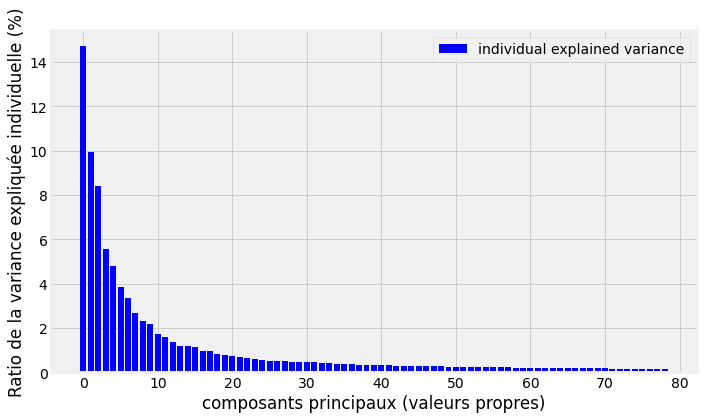

In [ ]:
''''
diagramme de l’éboulis des valeurs propres
'''

with plt.style.context('ggplot'):
    plt.figure(figsize=(10,6))
plt.bar(range(79), var_explained,color = "blue", align='center',label='individual explained variance')
plt.ylabel('Ratio de la variance expliquée individuelle (%)')
plt.xlabel('composants principaux (valeurs propres)')
plt.legend()
plt.tight_layout()

In [ ]:
new_eigen_vectors =new_eigen_vectors[:,sort_list[:30]]
new_eigen_values_2=[]
for i in range(30):
  new_eigen_values_2.append(new_eigen_values_1[sort_list[i]])
new_eigen_values_2

calculVariance(eig_values,new_eigen_values_2)

75.2803449074796

###7.Le nouvel axe

In [ ]:
final_mfeat = scaled_mfeat@ new_eigen_vectors
final_mfeat.shape

(2000, 30)

In [ ]:
'''Affichage du nouvel axe '''
final_mfeat


array([[ 1.05927411e+01, -1.41274328e+01,  3.55961538e+00, ...,
         1.48905691e-01,  1.53718834e+00, -1.70145590e+00],
       [ 7.86812029e+00, -1.32186626e+01, -4.59210812e-01, ...,
        -1.86077991e-01, -6.30405698e-01, -5.41871485e-01],
       [ 1.16816276e+01, -1.24763693e+01,  2.36723567e-01, ...,
        -9.11569347e-01,  1.37558070e-01,  9.64726476e-01],
       ...,
       [-3.10112073e+00, -8.12190695e+00, -7.01307408e+00, ...,
        -1.08206471e+00, -7.55819002e-01,  4.85581314e-01],
       [-2.99654347e-03, -9.37181440e+00, -1.15312560e+01, ...,
        -1.35926918e+00,  6.96603043e-01,  2.88466248e+00],
       [-1.30283216e+01, -5.33880323e+00, -6.17564203e-01, ...,
         1.34850065e-01, -8.82671278e-01, -1.10695312e+00]])

###8.NUAGE DE POINTS PROJETE SUR DEUX DIMENSIONS

entre la première colonne et la deuxième colonne 

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

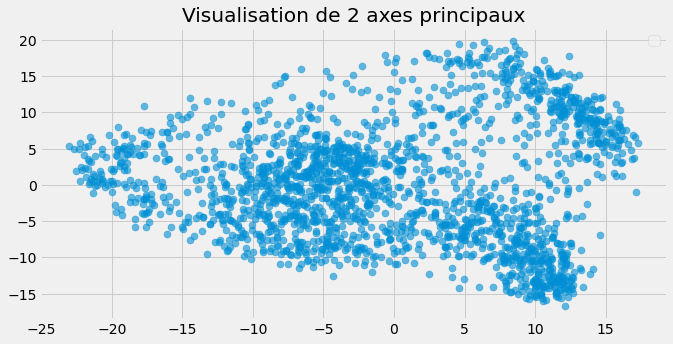

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_mfeat[:,0], final_mfeat[:,1],alpha = 0.6,s=50)
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()


entre la 29re colonne et la 30ème colonne

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Visualisation de 2 axes principaux')

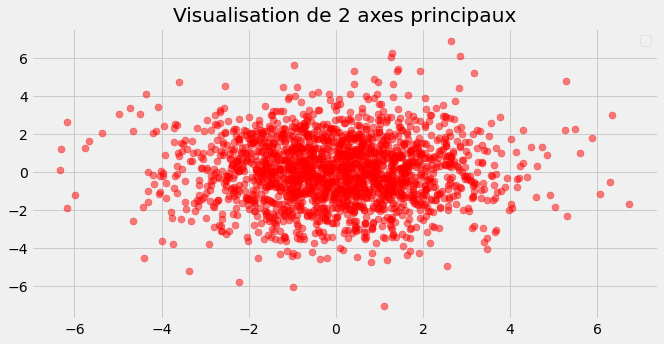

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_mfeat[:,28], final_mfeat[:,29],alpha = 0.5,s=50,c="red")
plt.legend()
plt.title('Visualisation de {} axes principaux'.format(2))
#plt.grid()

#METHODE KMEANS

###1.Choix du meilleur nombre de cluster

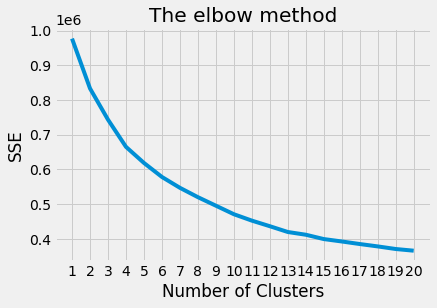

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(final_mfeat)
  sse.append(kmeans.inertia_)



plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# k value assigned to 10
kmeans = KMeans(
init="random",
n_clusters=13,
n_init=10,
max_iter=300,
random_state=42)

In [ ]:
# fitting the values
kmeans.fit(final_mfeat)

KMeans(init='random', n_clusters=13, random_state=42)

###Affichez valeur de SSE (sum of squared)

In [ ]:
# printing the value of inertia

print("La valeur de SSE: ",kmeans.inertia_)

La valeur de SSE:  419842.25154376077


###Affichez le centre des clusters





In [ ]:
# Cluster centers
kmeans.cluster_centers_

array([[ 6.22265582e+00,  1.57793566e+01, -3.45826679e+00,
        -1.78090743e+00, -2.14025449e+00, -5.83145761e+00,
        -2.11403333e+00,  2.22394106e+00,  1.52363639e+00,
        -1.53014382e+00, -1.94767051e-01,  5.73870397e-01,
         4.83530698e+00,  1.19113325e+00,  1.06879110e+00,
        -8.77809848e-01,  1.34987786e+00, -7.45900337e-01,
         1.68239366e-01,  4.92660300e-03,  1.10671519e+00,
        -3.35170552e-01, -3.06115328e-01, -2.28619434e-01,
        -3.83877122e-01,  4.21588731e-01, -6.08678658e-01,
         1.18577993e-01,  6.10957974e-02,  7.45337125e-01],
       [-3.99238415e+00,  3.47288280e+00, -1.21170315e+01,
        -5.50204814e+00, -6.32068549e+00,  5.62209527e+00,
        -7.52833006e-01,  1.47965895e+00,  5.89130502e-01,
         2.74830417e+00,  2.03314501e+00, -1.53687509e+00,
        -1.30147481e+00,  4.76545817e-01,  2.53185978e-02,
        -9.08647046e-01,  3.69023768e-01, -1.84775830e-01,
         3.06402938e-01,  2.17786605e-01, -6.89624207e-

###Le nombre d'itération

In [ ]:
# The number of iterations required to converge
print("Nombre d'itération : ",kmeans.n_iter_)

Nombre d'itération :  28


###Obtenir les labels

In [ ]:
kmeans.labels_

array([ 4,  4,  4, ...,  3,  3, 11], dtype=int32)

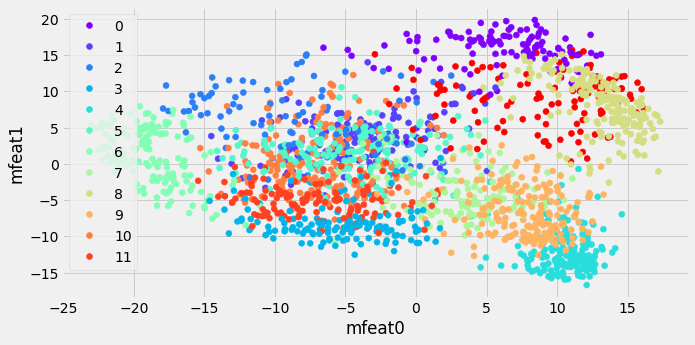

In [ ]:
# ploting the graph
plt.figure(figsize=(10,5))
scatter = plt.scatter(x= final_mfeat[:, 0], y=final_mfeat[:, 1], c= kmeans.labels_, cmap="rainbow")
plt.xlabel('mfeat0')
plt.ylabel('mfeat1')

# creation des labels pour les differents clusters
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4,5,6,7,8,9,10,11]);

###Affichage du centre des cluster

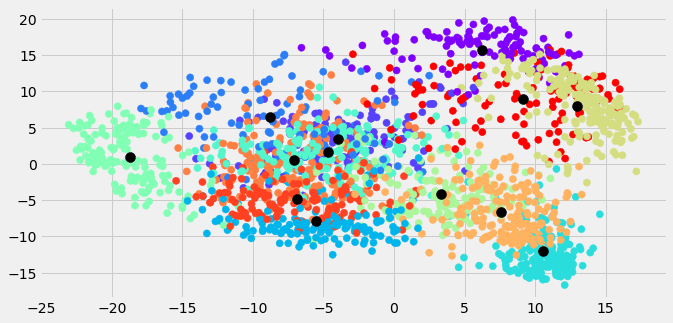

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(final_mfeat[:,0], final_mfeat[:,1], c=kmeans.labels_, s=50, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],s=100, c="black")
plt.show()

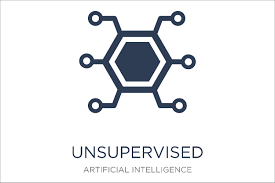

#**FIN**
#**MERCI !!!**